<a href="https://colab.research.google.com/github/Azwraithz/Coderhouse-DataScience-C77695/blob/main/Proyecto_Final_Morales_Luis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Abstract**

# **An√°lisis exploratorio sobre el Comportamiento de Compras de Clientes**

El presente proyecto se centra en el an√°lisis exploratorio sobre el **Comportamiento de Compras de Clientes**, utilizando un dataset que combina informaci√≥n demogr√°fica, caracter√≠sticas de los productos adquiridos, variables de temporada, talles y precios. El prop√≥sito es detectar patrones relevantes, relaciones entre variables y posibles anomal√≠as que ayuden a comprender mejor los factores que influyen en las decisiones de consumo. A trav√©s de t√©cnicas de limpieza de datos, estad√≠sticas descriptivas y visualizaciones, se construye un panorama inicial que permite evaluar la calidad de la informaci√≥n y extraer hallazgos significativos.

M√°s all√° de describir las tendencias, el an√°lisis busca aportar una mirada pr√°ctica orientada al negocio, identificando diferencias en h√°bitos de compra entre grupos de clientes, variaciones seg√∫n temporada y productos m√°s representativos. Estos resultados funcionan como insumos para la toma de decisiones estrat√©gicas, as√≠ como para futuros procesos de segmentaci√≥n y modelado predictivo, fortaleciendo la capacidad de anticipar comportamientos y dise√±ar acciones m√°s efectivas de marketing y fidelizaci√≥n.

## Preguntas de inter√©s / Hip√≥tesis


1. ¬øQu√© caracteristicas poseen los clientes que participan en este relevamiento?
2. ¬øQu√© edad poseen? ¬øHay un g√©nero con mayor participaci√≥n? ¬øLocalidad a la que pertenecen?
3. ¬øQu√© comportamiendo presentan los clientes por temporadas?
4. ¬øC√≥mo se relaciona la frecuencia de compras?
5. ¬øCual√©s son los medios de pagos mas utilizados y en que temporada?
6. ¬øQu√© localidades presentan un mayor consumo?
7. ¬øCu√°l fue el articulo m√°s comprado por los clientes?




In [64]:
# Importaciones de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [65]:
# Lectura de archivo CSV - memoria
# df = pd.read_csv('/content/tendencia_de_compras.csv')

In [66]:
# Lectura de archivo CSV - Github
df = pd.read_csv('https://raw.githubusercontent.com/Azwraithz/Coderhouse-DataScience-C77695/refs/heads/main/tendencia_de_compras.csv')

In [67]:
# An√°lisis exploratorios de la estructura
print('Dimensi√≥n del DataFrame: ', df.shape)
print('Nombre de columnas:', df.columns)

Dimensi√≥n del DataFrame:  (3900, 19)
Nombre de columnas: Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')


In [68]:
# Renombrar columnas para eliminar espacios o guiones medios
def rename_col(s):
    s = s.replace(' ', '_')
    s = s.replace('-', '_')
    a = s.split('_')
    for i in range(len(a)):
        if not all([c == c.upper() for c in a[i]]):
            a[i] = a[i].capitalize()
    return '_'.join(a)

df.rename(columns={c: rename_col(c) for c in df.columns}, inplace=True)
df.head()

Customer_ID  Age Gender Item_Purchased  Category  Purchase_Amount_(USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review_Rating Subscription_Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment_Method  Shipping_Type Discount_Applied Promo_Code_Used  \
0    Credit Card        Express              Yes             Yes   
1  Bank Transfer        Express              Yes             Yes   
2           Cash  Free Shipping              Yes             Yes   
3         PayPal   Next Day Air              Yes             Yes   
4           Cash  Free Shipping              Yes             Yes   

   Previous_Purchases Preferred_Payment_Method Frequency_Of_Purchases  
0                  14                    Venmo            Fortnightly  
1                   2                     Cash            Fortnightly  
2                  23              Credit Card                 Weekly  
3                  49                   PayPal                 Weekly  
4                  31                   PayPal               Annually

In [69]:
# An√°lisis exploratorios de la estructura
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_(USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [70]:
# An√°lisis exploratorios de la estructura
df.dtypes

Customer_ID                   int64
Age                           int64
Gender                       object
Item_Purchased               object
Category                     object
Purchase_Amount_(USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review_Rating               float64
Subscription_Status          object
Payment_Method               object
Shipping_Type                object
Discount_Applied             object
Promo_Code_Used              object
Previous_Purchases            int64
Preferred_Payment_Method     object
Frequency_Of_Purchases       object
dtype: object

In [71]:
# An√°lisis exploratorios de la estructura
df.head()

Customer_ID  Age Gender Item_Purchased  Category  Purchase_Amount_(USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review_Rating Subscription_Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment_Method  Shipping_Type Discount_Applied Promo_Code_Used  \
0    Credit Card        Express              Yes             Yes   
1  Bank Transfer        Express              Yes             Yes   
2           Cash  Free Shipping              Yes             Yes   
3         PayPal   Next Day Air              Yes             Yes   
4           Cash  Free Shipping              Yes             Yes   

   Previous_Purchases Preferred_Payment_Method Frequency_Of_Purchases  
0                  14                    Venmo            Fortnightly  
1                   2                     Cash            Fortnightly  
2                  23              Credit Card                 Weekly  
3                  49                   PayPal                 Weekly  
4                  31                   PayPal               Annually

In [72]:
# An√°lisis exploratorios de estad√≠sticas
df.describe()

Customer_ID          Age  Purchase_Amount_(USD)  Review_Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous_Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000

In [73]:
# An√°lisis exploratorios de estad√≠sticas
df.describe(include="O")

Gender Item_Purchased  Category Location  Size  Color  Season  \
count    3900           3900      3900     3900  3900   3900    3900   
unique      2             25         4       50     4     25       4   
top      Male         Blouse  Clothing  Montana     M  Olive  Spring   
freq     2652            171      1737       96  1755    177     999   

       Subscription_Status Payment_Method  Shipping_Type Discount_Applied  \
count                 3900           3900           3900             3900   
unique                   2              6              6                2   
top                     No    Credit Card  Free Shipping               No   
freq                  2847            696            675             2223   

       Promo_Code_Used Preferred_Payment_Method Frequency_Of_Purchases  
count             3900                     3900                   3900  
unique               2                        6                      7  
top                 No                   PayPal         Every 3 Months  
freq              2223                      677                    584

In [74]:
# An√°lisis exploratorios de estad√≠sticas
df.describe().T

count         mean          std   min     25%     50%  \
Customer_ID            3900.0  1950.500000  1125.977353   1.0  975.75  1950.5   
Age                    3900.0    44.068462    15.207589  18.0   31.00    44.0   
Purchase_Amount_(USD)  3900.0    59.764359    23.685392  20.0   39.00    60.0   
Review_Rating          3900.0     3.749949     0.716223   2.5    3.10     3.7   
Previous_Purchases     3900.0    25.351538    14.447125   1.0   13.00    25.0   

                           75%     max  
Customer_ID            2925.25  3900.0  
Age                      57.00    70.0  
Purchase_Amount_(USD)    81.00   100.0  
Review_Rating             4.40     5.0  
Previous_Purchases       38.00    50.0

In [75]:
# An√°lisis exploratorios de estad√≠sticas - Valores √∫nicos por columna
df.nunique()

Customer_ID                 3900
Age                           53
Gender                         2
Item_Purchased                25
Category                       4
Purchase_Amount_(USD)         81
Location                      50
Size                           4
Color                         25
Season                         4
Review_Rating                 26
Subscription_Status            2
Payment_Method                 6
Shipping_Type                  6
Discount_Applied               2
Promo_Code_Used                2
Previous_Purchases            50
Preferred_Payment_Method       6
Frequency_Of_Purchases         7
dtype: int64

In [76]:
# An√°lisis exploratorios de estad√≠sticas - Para corroborar algun campo necesario
df['Category'].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [77]:
# An√°lisis exploratorios - Valores faltantes - Por columna
df.isna().sum()

Customer_ID                 0
Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_(USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_Of_Purchases      0
dtype: int64

In [78]:
# An√°lisis exploratorios - Valores faltantes - Porcentajes de nulos
df.isna().mean ()

Customer_ID                 0.0
Age                         0.0
Gender                      0.0
Item_Purchased              0.0
Category                    0.0
Purchase_Amount_(USD)       0.0
Location                    0.0
Size                        0.0
Color                       0.0
Season                      0.0
Review_Rating               0.0
Subscription_Status         0.0
Payment_Method              0.0
Shipping_Type               0.0
Discount_Applied            0.0
Promo_Code_Used             0.0
Previous_Purchases          0.0
Preferred_Payment_Method    0.0
Frequency_Of_Purchases      0.0
dtype: float64

In [79]:
# An√°lisis exploratorios - Valores faltantes - Cantidad de filas duplicadas
print('Cantidad de registros duplicados:', df.duplicated().sum())

Cantidad de registros duplicados: 0


En este punto se confirma que el conjunto de datos est√° limpio, es consistente y est√° listo para un posterior an√°lisis.

# An√°lisis demogr√°fico de clientes



In [80]:
# Conteo de clientes categorizados por g√©nero:
df['Gender'].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [81]:
# Distribuci√≥n por g√©nero
df['Gender'].value_counts(normalize=True) * 100

Gender
Male      68.0
Female    32.0
Name: proportion, dtype: float64

In [82]:
# Promedio de edad de los clientes
average_age = df["Age"].mean()

In [83]:
# Distribuci√≥n de clientes por rangos etarios
bins = [15, 25, 35, 45, 55, 65, 100]
labels = ["16-25", "26-35", "36-45", "46-55", "56-65", "65+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)

df["AgeGroup"].value_counts(normalize=True) * 100

AgeGroup
46-55    19.307692
56-65    19.230769
26-35    19.025641
36-45    18.692308
16-25    14.641026
65+       9.102564
Name: proportion, dtype: float64

In [84]:
# TOP 10 de localidades a las que pertenecen los clientes
df['Location'].value_counts().head(10)

Location
Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Minnesota     88
New York      87
Nevada        87
Nebraska      87
Delaware      86
Name: count, dtype: int64

In [85]:
# Edad promedio por g√©nero de los clientes
df.groupby('Gender')['Age'].mean()

Gender
Female    44.007212
Male      44.097285
Name: Age, dtype: float64

In [86]:
# Edad promedio por localidad
df.groupby('Location')['Age'].mean().sort_values(ascending=False)

Location
Louisiana         48.154762
Indiana           48.050633
South Carolina    47.500000
Connecticut       47.320513
Maryland          46.895349
Ohio              46.532468
Rhode Island      46.476190
Wisconsin         45.973333
Missouri          45.740741
North Carolina    45.730769
Minnesota         45.477273
Arizona           45.276923
Massachusetts     45.208333
New Jersey        45.029851
Washington        44.397260
New Hampshire     44.323944
Alabama           44.314607
Colorado          44.146667
Arkansas          44.101266
Tennessee         44.051948
New Mexico        44.024691
South Dakota      44.014286
New York          43.931034
Oklahoma          43.880000
Montana           43.822917
Georgia           43.772152
North Dakota      43.771084
Nevada            43.609195
Oregon            43.554054
Utah              43.309859
Idaho             43.301075
Illinois          43.282609
Mississippi       43.262500
Kansas            43.079365
Delaware          43.069767
Alaska            43.000000
Pennsylvania      42.972973
Texas             42.740260
Hawaii            42.692308
Nebraska          42.666667
California        42.663158
Vermont           42.600000
West Virginia     42.543210
Wyoming           42.507042
Florida           42.323529
Kentucky          42.265823
Michigan          42.095890
Maine             41.935065
Virginia          41.610390
Iowa              40.173913
Name: Age, dtype: float64

## Conclusiones del an√°lisis demogr√°fico

En este dataset participan de 3.900 clientes de los cuales:

*   Masculinos: 2.652 clientes (68%)
*   Femeninos: 1.248 clientes (32%)

Cliente m√°s joven: 18 a√±os

Clientes de mayor edad: 70 a√±os

La edad promedio de ellos es: 44 a√±os

Se distribuyen de la siguiente formas de acuerdo a los siguientes rangos etarios:

*   16-25: 14.64%
*   26-35: 19.02%
*   36-45: 18.69%
*   46-55: 19.30%
*   56-65: 19.23%
*   65+: 9.10%

TOP 10 de localidades a las que pertenecen los clientes:

1.   Montana:	96
2.   California: 95
3.   Idaho: 93
4.   Illinois: 92
5.   Alabama: 89
6.   Minnesota:	88
7.   New York:	87
8.   Nevada:	87
9.   Nebraska:	87
10.   Delaware:	86

Las caracteristicas de edad y g√©nero de los clientes se representan en los siguientes gr√°ficos:

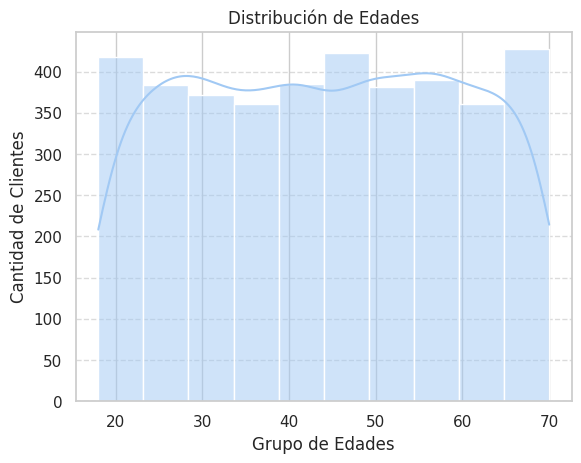

In [87]:
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Distribuci√≥n de Edades")
plt.ylabel("Cantidad de Clientes")
plt.xlabel("Grupo de Edades")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

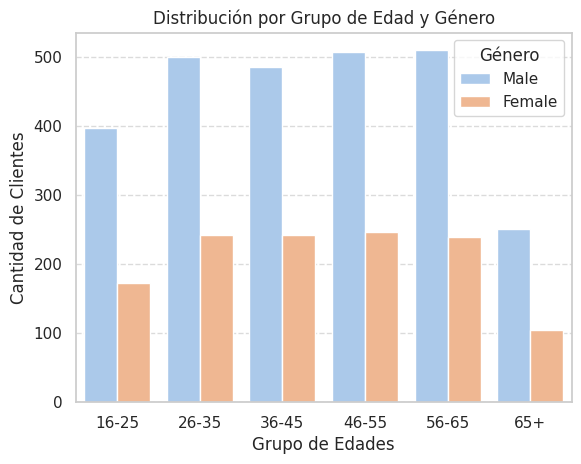

In [88]:
sns.countplot(x="AgeGroup", hue="Gender", data=df)
plt.title("Distribuci√≥n por Grupo de Edad y G√©nero")
plt.ylabel("Cantidad de Clientes")
plt.xlabel("Grupo de Edades")
plt.legend(title="G√©nero")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

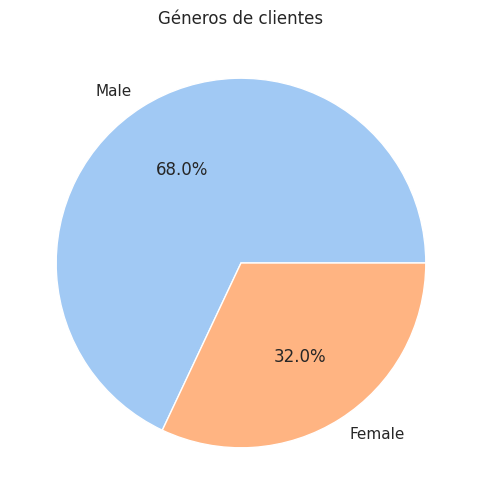

In [89]:
plt.figure(figsize=(10,6))
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].unique(),autopct='%1.1f%%')
plt.title('G√©neros de clientes')
plt.show()

# An√°lisis de Comportamiento de compras por temporada
Identificando patrones y tendencias de consumo para optimizar estrategias comerciales seg√∫n la estaci√≥n del a√±o.

In [90]:
# Ventas por temporadas (Precios en dolares)
ventas = df.groupby("Season")["Purchase_Amount_(USD)"].sum().sort_values(ascending=False)
print(ventas)

Season
Fall      60018
Spring    58679
Winter    58607
Summer    55777
Name: Purchase_Amount_(USD), dtype: int64


In [91]:
# Resumen de montos de acuerdo al metodo de pago
pagos = df["Payment_Method"].value_counts()
print(pagos)

Payment_Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64


In [92]:
# Matriz que combina la temporada y monto pagado por cada m√©todo de pago
matriz_pago_temporada = df.pivot_table(
    index="Season",
    columns="Payment_Method",
    values="Purchase_Amount_(USD)",
    aggfunc="sum",
    fill_value=0
)

print(matriz_pago_temporada)

Payment_Method  Bank Transfer   Cash  Credit Card  Debit Card  PayPal  Venmo
Season                                                                      
Fall                     9422   9489        11411       10283    9900   9513
Spring                  10404  10064        10510        8589    8850  10262
Summer                   9083   9459         9084        8923    9227  10001
Winter                   8214   9821        11562        9323    9472  10215


In [93]:
# Media de compras previas vs Frecuencia
frecuencias = df.groupby("Frequency_Of_Purchases")["Previous_Purchases"].agg(["count","mean","median"]).sort_values(by="mean", ascending=False)
print(frecuencias)


                        count       mean  median
Frequency_Of_Purchases                          
Quarterly                 563  26.854352    28.0
Weekly                    539  25.771800    26.0
Monthly                   553  25.278481    25.0
Fortnightly               542  25.271218    26.0
Every 3 Months            584  24.960616    24.0
Bi-Weekly                 547  24.787934    24.0
Annually                  572  24.561189    24.0


In [94]:
# Top de localidades con mayor consumo
locations = df.groupby("Location")["Purchase_Amount_(USD)"].sum().sort_values(ascending=False).head(5)
print(locations)

Location
Montana       5784
Illinois      5617
California    5605
Idaho         5587
Nevada        5514
Name: Purchase_Amount_(USD), dtype: int64


<Axes: title={'center': 'Ventas totales por temporada (USD)'}, xlabel='Season'>

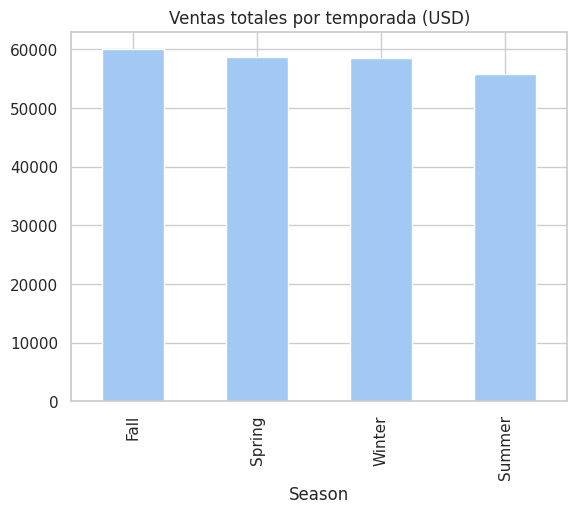

In [95]:
ventas.plot(kind="bar", title="Ventas totales por temporada (USD)")

<Axes: title={'center': 'M√©todos de pagos m√°s utilizados'}, xlabel='Payment_Method'>

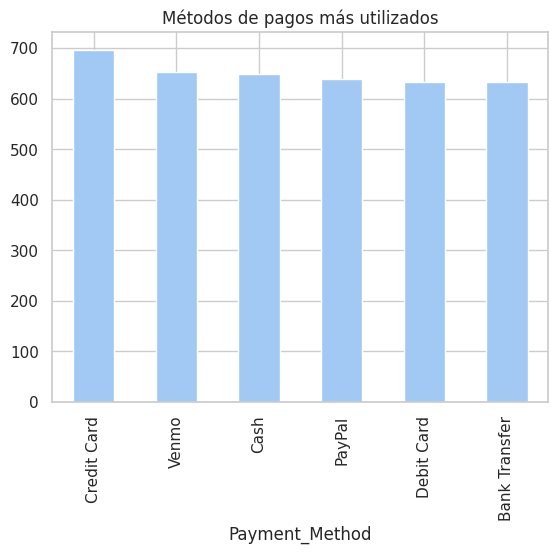

In [96]:
pagos.plot(kind="bar", title="M√©todos de pagos m√°s utilizados")

<Axes: title={'center': 'Media de compras previas vs Frecuencia'}, xlabel='Frequency_Of_Purchases'>

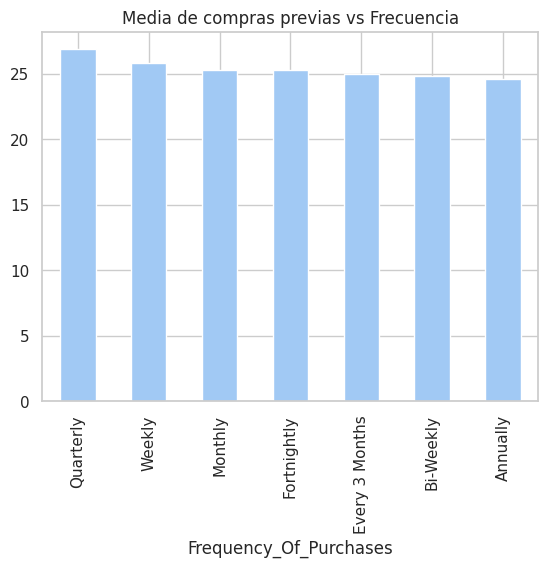

In [97]:
frecuencias["mean"].plot(kind="bar", title="Media de compras previas vs Frecuencia")

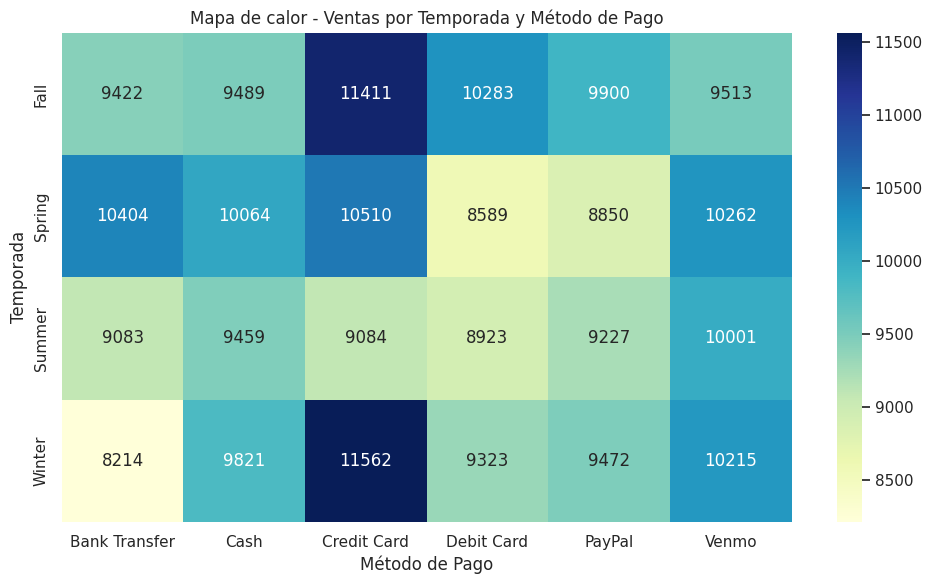

In [98]:
plt.figure(figsize=(10,6))
sns.heatmap(
    matriz_pago_temporada,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu"
)

plt.title("Mapa de calor - Ventas por Temporada y M√©todo de Pago")
plt.xlabel("M√©todo de Pago")
plt.ylabel("Temporada")
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Top 5 Locations by Total Purchase Amount (USD)'}, xlabel='Location'>

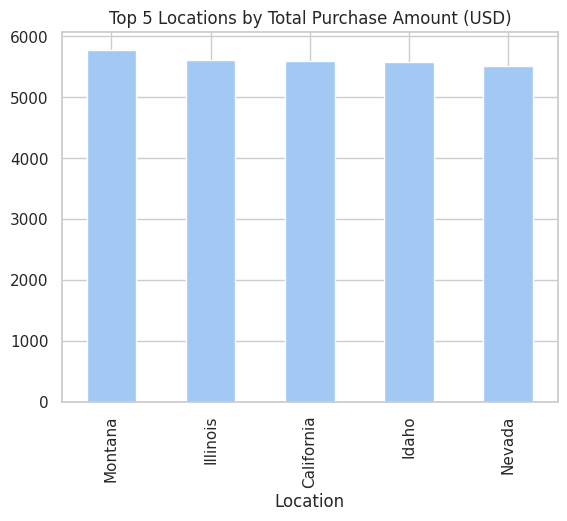

In [99]:
locations.plot(kind="bar", title="Top 5 Locations by Total Purchase Amount (USD)")

## Conclusiones del an√°lisis de comportamiento

Se tienen en cuenta datos que revela patrones significativos en el comportamiento de compra seg√∫n temporadas, m√©todos de pago, frecuencias de compra y ubicaciones geogr√°ficas.

* ### Ventas por Temporada

La temporada de oto√±o registra el mayor volumen de ventas con 60.018 USD, seguida de cerca por primavera 58.679 USD y invierno 58.607 USD, mientras que el verano presenta el menor monto con 55.777 USD. Esto sugiere una mayor actividad comercial en oto√±o, posiblemente influenciada por eventos estacionales como el regreso a clases o festividades.

* ### M√©todos de Pago

La tarjeta de cr√©dito es el m√©todo de pago m√°s utilizado (696 transacciones), seguido por Venmo (653) y efectivo (648). Sin embargo, la distribuci√≥n es relativamente equilibrada entre los m√©todos, indicando una adopci√≥n diversa de opciones de pago. No se observan diferencias dr√°sticas en el uso de m√©todos electr√≥nicos versus tradicionales.

* ### Ventas por Temporada y M√©todo de Pago

La matriz de pagos por temporada muestra que la tarjeta de cr√©dito lidera en oto√±o 11.411 USD y invierno 11.562 USD, mientras que Venmo y efectivo tienen un uso notable en primavera 10.262 USD y 10.064 USD, respectivamente. El m√©todo de transferencia bancaria muestra menor uso en invierno 8.214 USD, lo que podr√≠a indicar preferencias estacionales en el uso de ciertos m√©todos.

* ### Frecuencia de Compras y Compras Previas

Los clientes que compran trimestralmente tienen el promedio m√°s alto de compras previas (26.85), mientras que los compradores anuales tienen el menor promedio (24.56). Esto sugiere que los clientes m√°s frecuentes tienden a acumular m√°s compras previas, aunque la mediana permanece relativamente estable (24-28), indicando una distribuci√≥n sim√©trica en el comportamiento de compra.

* ### Localidades con Mayor Consumo

Montana lidera el consumo total con $5,784, seguida por Illinois 5.617 USD, California 5.605 USD, Idaho 5.587 USD y Nevada 5.514 USD. La proximidad en los montos sugiere una distribuci√≥n geogr√°fica equilibrada del gasto, con Montana destacando como el mercado m√°s activo.

En resumen, el an√°lisis destaca la importancia del oto√±o como temporada clave para las ventas, la preferencia por tarjetas de cr√©dito y m√©todos electr√≥nicos como Venmo, y la relevancia de Montana como mercado l√≠der. Estos hallazgos pueden orientar estrategias comerciales, como campa√±as promocionales en oto√±o o en regiones espec√≠ficas como Montana, y la optimizaci√≥n de m√©todos de pago electr√≥nicos para maximizar la conversi√≥n.

# An√°lisis de las categorias de productos:

In [100]:
# Conteo total de cada categoria
df['Item_Purchased'].value_counts()

Item_Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Sandals       160
Socks         159
Skirt         158
Scarf         157
Shorts        157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

In [101]:
# Conteo total de cada producto
conteo_productos = df['Category'].value_counts()
print(conteo_productos)

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


In [102]:
# Total de ventas realizadas por categoria
ventas_productos = df.groupby("Category")["Purchase_Amount_(USD)"].sum().sort_values(ascending=False)
print(ventas_productos)

Category
Clothing       104264
Accessories     74200
Footwear        36093
Outerwear       18524
Name: Purchase_Amount_(USD), dtype: int64


In [103]:
# Promedio de ventas por categoria
categoria_producto = df.groupby("Category")["Purchase_Amount_(USD)"].mean().sort_values(ascending=False)
print(categoria_producto)

Category
Footwear       60.255426
Clothing       60.025331
Accessories    59.838710
Outerwear      57.172840
Name: Purchase_Amount_(USD), dtype: float64


In [104]:
# Conteo de compras realizadas por genero y categoria del producto
conteo_por_genero = pd.crosstab(df["Category"], df["Gender"])
print(conteo_por_genero)

Gender       Female  Male
Category                 
Accessories     392   848
Clothing        556  1181
Footwear        199   400
Outerwear       101   223


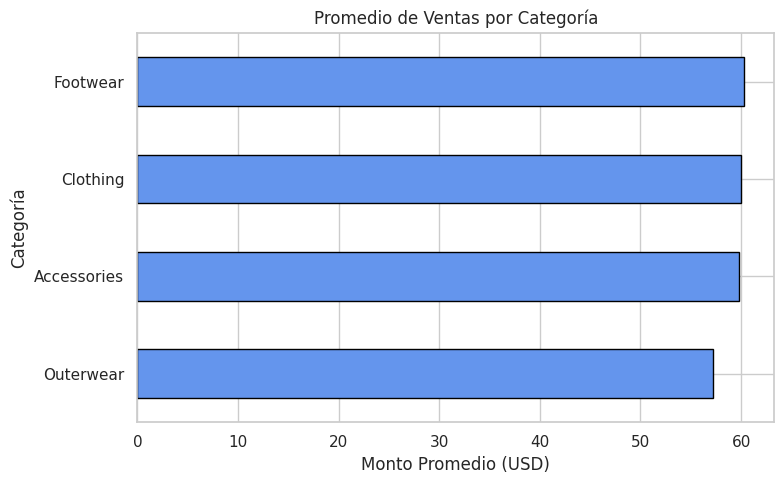

In [105]:
plt.figure(figsize=(8,5))
categoria_producto.plot(kind="barh", color="cornflowerblue", edgecolor="black")

plt.title("Promedio de Ventas por Categor√≠a")
plt.xlabel("Monto Promedio (USD)")
plt.ylabel("Categor√≠a")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

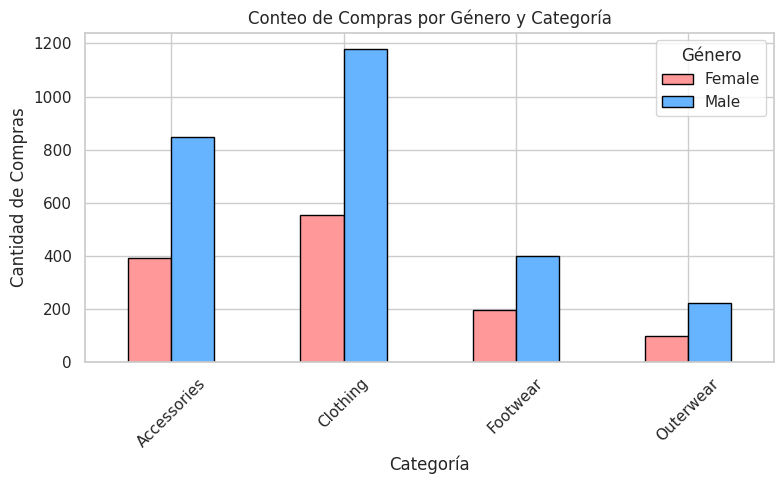

In [106]:
conteo_por_genero.plot(
    kind="bar",
    figsize=(8,5),
    color=["#ff9999", "#66b3ff"],  # Female = rosa, Male = azul
    edgecolor="black"
)

plt.title("Conteo de Compras por G√©nero y Categor√≠a")
plt.xlabel("Categor√≠a")
plt.ylabel("Cantidad de Compras")
plt.xticks(rotation=45)
plt.legend(title="G√©nero")
plt.tight_layout()
plt.show()

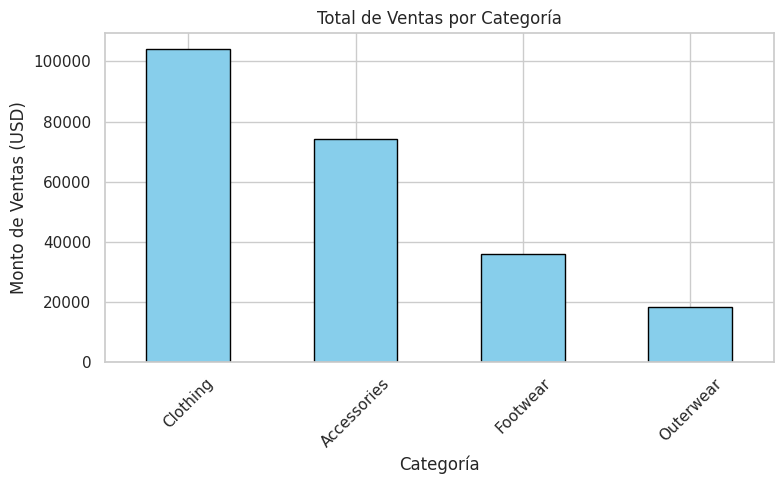

In [107]:
# Gr√°fico de barras
plt.figure(figsize=(8,5))
ventas_productos.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Total de Ventas por Categor√≠a")
plt.xlabel("Categor√≠a")
plt.ylabel("Monto de Ventas (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

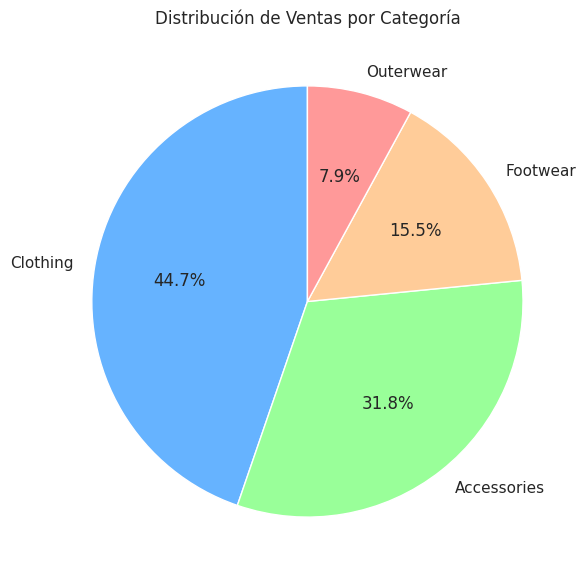

In [108]:
plt.figure(figsize=(7,7))
ventas_productos.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    colors=["#66b3ff", "#99ff99", "#ffcc99", "#ff9999"]
)
plt.title("Distribuci√≥n de Ventas por Categor√≠a")
plt.ylabel("")
plt.show()

## Conclusiones del an√°lisis de las categorias de productos

El an√°lisis de las categor√≠as de productos revela que Clothing lidera tanto en volumen de ventas 104.264 USD como en conteo de productos 1.737 unidades, destacando art√≠culos como blusas, pantalones y joyer√≠a con 171 unidades cada uno.

Le sigue Accessories con 74.200 USD en ventas y 1.240 unidades, donde productos como cinturones y gafas de sol son prominentes. Footwear registra 36.093 USD en ventas de 599 unidades, con un promedio de compra m√°s alto de 60.26 USD por unidad, mientras que Outerwear tiene el menor volumen 18.524 USD, con 324 unidades y el promedio m√°s bajo 57.17 USD.

Por g√©nero, los hombres dominan las compras en todas las categor√≠as, especialmente en Clothing 1.181 vs. 556 de mujeres y Accessories 848 vs. 392. Este predominio masculino sugiere una mayor demanda de productos por parte de este segmento. En general, Clothing y Footwear destacan como categor√≠as clave por su contribuci√≥n al volumen y valor de las ventas, lo que podr√≠a orientar estrategias de marketing hacia estos segmentos, especialmente hacia el p√∫blico masculino.

# **Abstract**

# **An√°lisis y Predicci√≥n del Comportamiento de Compra del Cliente usando Machine Learning**

**Contexto**: Comprender el comportamiento de compra del cliente es fundamental para optimizar el inventario, personalizar las campa√±as de marketing y mejorar la retenci√≥n. Este proyecto busca analizar un conjunto de datos de transacciones para identificar patrones demogr√°ficos y estacionales, y predecir futuros comportamientos.

**Objetivo de Investigaci√≥n:**
1.   Modelo de Regresi√≥n (Score Continuo): Predecir el monto de la compra (Purchase_Amount_(USD)) utilizando un modelo de regresi√≥n (ej. Regresi√≥n Lineal o Elastic Net). Esto permite identificar variables que influyen en el gasto del cliente.

2.   Modelo de Clasificaci√≥n (Baseline Explicable): Predecir si un cliente se suscribir√° (Subscription_Status = 'Yes'/'No') utilizando Regresi√≥n Log√≠stica. Esto ayuda a enfocar esfuerzos de retenci√≥n y marketing.

| Supuesto                                                         | Acci√≥n / Justificaci√≥n                                                                                                       |
| ---------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| Outliers en Age o Purchase_Amount_(USD)                          | Podr√≠an sesgar los modelos de regresi√≥n. Se analizar√°n con boxplots y se considerar√° un filtrado por IQR (1.5 √ó RIC).        |
| Datos Faltantes                                                  | Si alguna columna clave tiene < 5% de nulos, se usar√° imputaci√≥n simple (media/mediana o moda).                              |
| Multicolinealidad (ej. entre Age y Previous_Purchases)           | Si el VIF (Factor de Inflaci√≥n de Varianza) es > 5, se considerar√° eliminar una variable o usar regularizaci√≥n (Elastic Net).|
| Desbalance de Clases (en Subscription_Status)                    | Si una clase (ej. 'Yes') es < 10-15%, se usar√° class_weight='balanced' en la Regresi√≥n Log√≠stica.                            |



**Hip√≥tesis nulas y pruebas estad√≠sticas**

**H1: Influencia demogr√°fica en el gasto**

Se espera que existan diferencias significativas en el monto de compra (`Purchase_Amount_(USD)`) y los tipos de productos adquiridos (`Category`, `Item_Purchased`) seg√∫n las caracter√≠sticas demogr√°ficas de los clientes, como la edad (`Age`) y el g√©nero (`Gender`).

| Variables	                       | H‚ÇÄ (Hip√≥tesis Nula)                                      | Test Estad√≠stico                                                            |
| ------------------------------------ | -------------------------------------------------------- | --------------------------------------------------------------------------- |
| Gender vs Purchase_Amount_(USD)      | La media de gasto es igual entre g√©neros.                | t-test (o Mann-Whitney U si los datos no son normales).                     |
| Age vs Purchase_Amount_(USD)         | No hay correlaci√≥n lineal entre la edad y el gasto.      | Correlaci√≥n de Pearson (r).                                                 |
| Gender vs Category                   | El g√©nero es independiente de la categor√≠a de producto.  | Chi-cuadrado (œá¬≤) de independencia.                                         |
| Age (en rangos) vs Category          | La edad es independiente de la categor√≠a de producto.    | Chi-cuadrado (œá¬≤) de independencia.                                         |

**H2: Estacionalidad de las compras**

La temporada del a√±o (Season) influye en el volumen total de ventas y en la preferencia por ciertas categor√≠as de productos. Se anticipa que algunas temporadas (Season) registrar√°n mayores ventas y/o un enfoque en productos espec√≠ficos (por ejemplo, ropa de abrigo en invierno, trajes de ba√±o en verano).

| Variables                            | H‚ÇÄ (Hip√≥tesis Nula)                                      | Test Estad√≠stico                                |
| ------------------------------------ | -------------------------------------------------------- | ----------------------------------------------- |
| Season vs Purchase_Amount_(USD)      | La media de gasto es la misma en todas las temporadas.	  | ANOVA (o Kruskal-Wallis si no hay normalidad).  |
| Season vs Category	               | La temporada es independiente de la categor√≠a comprada.  | Chi-cuadrado (œá¬≤) de independencia.             |

**H3: Relaci√≥n entre Compras Previas y Frecuencia**

Existe una correlaci√≥n positiva entre el n√∫mero de compras previas (Previous_Purchases) de un cliente y su frecuencia de compra actual (Frequency_Of_Purchases). Los clientes con un historial de m√°s compras tender√°n a comprar con mayor regularidad.

| Variables	                                | H‚ÇÄ (Hip√≥tesis Nula)	                                                         | Test Estad√≠stico           |
| --------------------------------------------- | ------------------------------------------------------------------------------ | -------------------------- |
| Frequency_Of_Purchases vs Previous_Purchases  | La media de compras previas es la misma para todas las frecuencias de compra.  | ANOVA (o Kruskal-Wallis).  |

**Conclusi√≥n**: Este proyecto utiliza Machine Learning para predecir el comportamiento de compras de clientes bas√°ndose en datos demogr√°ficos, de productos y transaccionales. El objetivo es identificar factores clave que influyen en la frecuencia de compra y generar un modelo predictivo que mejore las estrategias comerciales y la toma de decisiones orientadas al cliente.

**Estructura del dataset**

El dataset de Comportamiento de Compras de Clientes contiene la siguiente informaci√≥n:

*   **Customer_ID**: Identificador √∫nico para cada cliente.
*   **Age**: Edad del cliente.
*   **Gender**: G√©nero del cliente (Male/Female).
*   **Item_Purchased**: Art√≠culo espec√≠fico que fue comprado.
*   **Category**: Categor√≠a general del producto comprado (e.g., Clothing, Accessories).
*   **Purchase_Amount_(USD)**: Monto de la compra en d√≥lares estadounidenses.
*   **Location**: Ubicaci√≥n geogr√°fica del cliente (Estado en EE.UU.).
*   **Size**: Talle del art√≠culo comprado (e.g., S, M, L, XL).
*   **Color**: Color del art√≠culo comprado.
*   **Season**: Temporada en la que se realiz√≥ la compra (e.g., Winter, Spring, Summer, Fall).
*   **Review_Rating**: Calificaci√≥n de la rese√±a del producto (en una escala).
*   **Subscription_Status**: Estado de suscripci√≥n del cliente (Yes/No).
*   **Payment_Method**: M√©todo de pago utilizado para la transacci√≥n.
*   **Shipping_Type**: Tipo de env√≠o seleccionado.
*   **Discount_Applied**: Indica si se aplic√≥ un descuento (Yes/No).
*   **Promo_Code_Used**: Indica si se utiliz√≥ un c√≥digo promocional (Yes/No).
*   **Previous_Purchases**: N√∫mero de compras previas realizadas por el cliente.
*   **Preferred_Payment_Method**: M√©todo de pago preferido por el cliente.
*   **Frequency_Of_Purchases**: Frecuencia con la que el cliente realiza compras (e.g., Annually, Monthly).

**Observaciones iniciales**

Tras una primera exploraci√≥n del dataset "Comportamiento de Compras de Clientes", se destacan las siguientes observaciones iniciales:

*   El dataset contiene 3900 registros y 19 columnas, cubriendo aspectos demogr√°ficos, de producto, transaccionales y de comportamiento de compra.
*   No se identificaron valores nulos ni registros duplicados, lo que indica un dataset limpio y listo para el an√°lisis.
*   Las columnas incluyen una mezcla de tipos de datos num√©ricos (como `Age`, `Purchase_Amount_(USD)`, `Review_Rating`, `Previous_Purchases`) y categ√≥ricos (como `Gender`, `Category`, `Location`, `Season`, `Payment_Method`, `Frequency_Of_Purchases`).
*   Se observa una distribuci√≥n diversa en variables como la edad, el monto de compra y el n√∫mero de compras previas, aunque las estad√≠sticas descriptivas sugieren rangos y promedios consistentes.
*   Las variables categ√≥ricas presentan una variedad de niveles √∫nicos, siendo `Location` (50) y `Item_Purchased` (25) las que tienen m√°s categor√≠as distintas, mientras que otras como `Gender` o `Subscription_Status` tienen solo dos.
*   Se ha identificado que la frecuencia de compras presenta varias categor√≠as, lo que ser√° clave para el modelado predictivo.

In [109]:
# Importaci√≥n de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from IPython.display import HTML, display

# Modelado y preprocesamiento
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet

# M√©tricas
from sklearn.metrics import (
    # Clasificaci√≥n
    classification_report,
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    # Regresi√≥n
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    recall_score,
    precision_score
)

# Control de warnings

import warnings
warnings.filterwarnings("ignore")

In [110]:
# IMPORTACI√ìN DE DATOS
# ==========================================================
# URL del dataset
path = "https://raw.githubusercontent.com/Azwraithz/Coderhouse-DataScience-C77695/refs/heads/main/tendencia_de_compras.csv"

try:
    df = pd.read_csv(path)

    # Comprobaci√≥n b√°sica
    if not df.empty:
        display(HTML('''
        <div style="
            padding:12px;
            border-radius:10px;
            background:#e8f5e9;
            color:#2e7d32;
            font-family:Arial, sans-serif;
            font-size:14px;">
          <b>√âxito:</b> Los datos fueron cargados correctamente.<br>
          <b>Filas:</b> {} &nbsp; | &nbsp; <b>Columnas:</b> {}
        </div>
        '''.format(df.shape[0], df.shape[1])))
    else:
        display(HTML('''
        <div style="
            padding:12px;
            border-radius:10px;
            background:#fff3e0;
            color:#ef6c00;
            font-family:Arial, sans-serif;
            font-size:14px;">
          <b>Advertencia:</b> El archivo se carg√≥ pero est√° vac√≠o.
        </div>
        '''))
except Exception as e:
    display(HTML(f'''
    <div style="
        padding:12px;
        border-radius:10px;
        background:#ffebee;
        color:#c62828;
        font-family:Arial, sans-serif;
        font-size:14px;">
      <b>Error:</b> No se pudo cargar el dataset.<br>
      <b>Detalle:</b> {str(e)}
    </div>
    '''))


In [111]:
# Analisis exploratorio de datos
print("\033[1;34m--- Primeras 5 filas ---\033[0m")
display(df.head())

--- Primeras 5 filas ---


Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo Code Used  \
0    Credit Card        Express              Yes             Yes   
1  Bank Transfer        Express              Yes             Yes   
2           Cash  Free Shipping              Yes             Yes   
3         PayPal   Next Day Air              Yes             Yes   
4           Cash  Free Shipping              Yes             Yes   

   Previous Purchases Preferred Payment Method Frequency of Purchases  
0                  14                    Venmo            Fortnightly  
1                   2                     Cash            Fortnightly  
2                  23              Credit Card                 Weekly  
3                  49                   PayPal                 Weekly  
4                  31                   PayPal               Annually

In [112]:
# Analisis exploratorio de datos
print("\n\033[1;34m--- Informaci√≥n general y tipos de datos ---\033[0m")
df.info()


--- Informaci√≥n general y tipos de datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type   

In [113]:
# Analisis exploratorio de datos
print("\n\033[1;34m--- Estad√≠sticas descriptivas (Num√©ricas) ---\033[0m")
display(df.describe().T)


--- Estad√≠sticas descriptivas (Num√©ricas) ---


count         mean          std   min     25%     50%  \
Customer ID            3900.0  1950.500000  1125.977353   1.0  975.75  1950.5   
Age                    3900.0    44.068462    15.207589  18.0   31.00    44.0   
Purchase Amount (USD)  3900.0    59.764359    23.685392  20.0   39.00    60.0   
Review Rating          3900.0     3.749949     0.716223   2.5    3.10     3.7   
Previous Purchases     3900.0    25.351538    14.447125   1.0   13.00    25.0   

                           75%     max  
Customer ID            2925.25  3900.0  
Age                      57.00    70.0  
Purchase Amount (USD)    81.00   100.0  
Review Rating             4.40     5.0  
Previous Purchases       38.00    50.0

In [114]:
# Analisis exploratorio de datos
print("\n\033[1;34m--- Estad√≠sticas descriptivas (Categ√≥ricas) ---\033[0m")
display(df.describe(include='object').T)


--- Estad√≠sticas descriptivas (Categ√≥ricas) ---


count unique             top  freq
Gender                    3900      2            Male  2652
Item Purchased            3900     25          Blouse   171
Category                  3900      4        Clothing  1737
Location                  3900     50         Montana    96
Size                      3900      4               M  1755
Color                     3900     25           Olive   177
Season                    3900      4          Spring   999
Subscription Status       3900      2              No  2847
Payment Method            3900      6     Credit Card   696
Shipping Type             3900      6   Free Shipping   675
Discount Applied          3900      2              No  2223
Promo Code Used           3900      2              No  2223
Preferred Payment Method  3900      6          PayPal   677
Frequency of Purchases    3900      7  Every 3 Months   584

In [115]:
# Revisar valores nulos
print("\n\033[1;34m--- Conteo de valores nulos ---\033[0m")
print(df.isnull().sum())


--- Conteo de valores nulos ---
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


In [116]:
# Renombrar columnas para eliminar espacios o guiones medios
def rename_col(s):
    s = s.replace(' ', '_')
    s = s.replace('-', '_')
    a = s.split('_')
    for i in range(len(a)):
        if not all([c == c.upper() for c in a[i]]):
            a[i] = a[i].capitalize()
    return '_'.join(a)

df.rename(columns={c: rename_col(c) for c in df.columns}, inplace=True)

In [117]:
# Revisar balance de nuestras variables objetivo
print("\n\033[1;34m--- Clasificaci√≥n objetiva (Subscription_Status) ---\033[0m")
print(df['Subscription_Status'].value_counts(normalize=True))


--- Clasificaci√≥n objetiva (Subscription_Status) ---
Subscription_Status
No     0.73
Yes    0.27
Name: proportion, dtype: float64


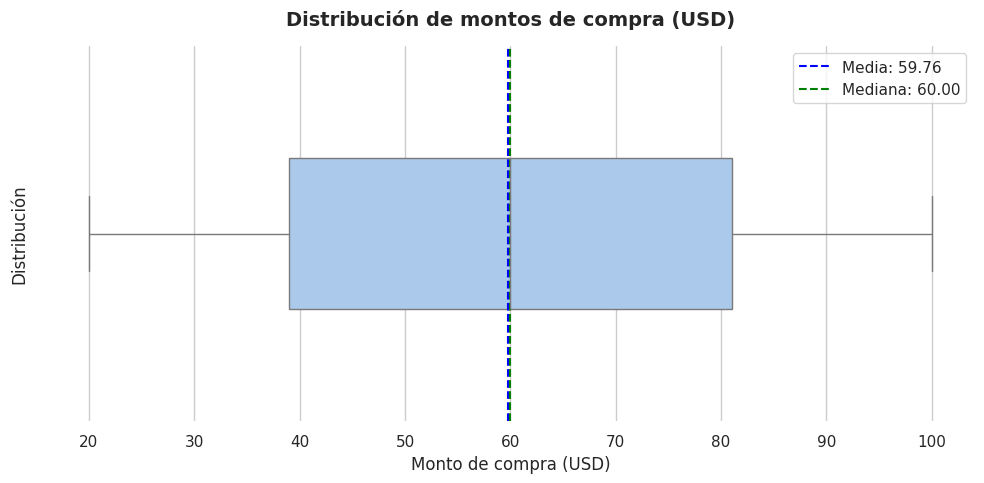

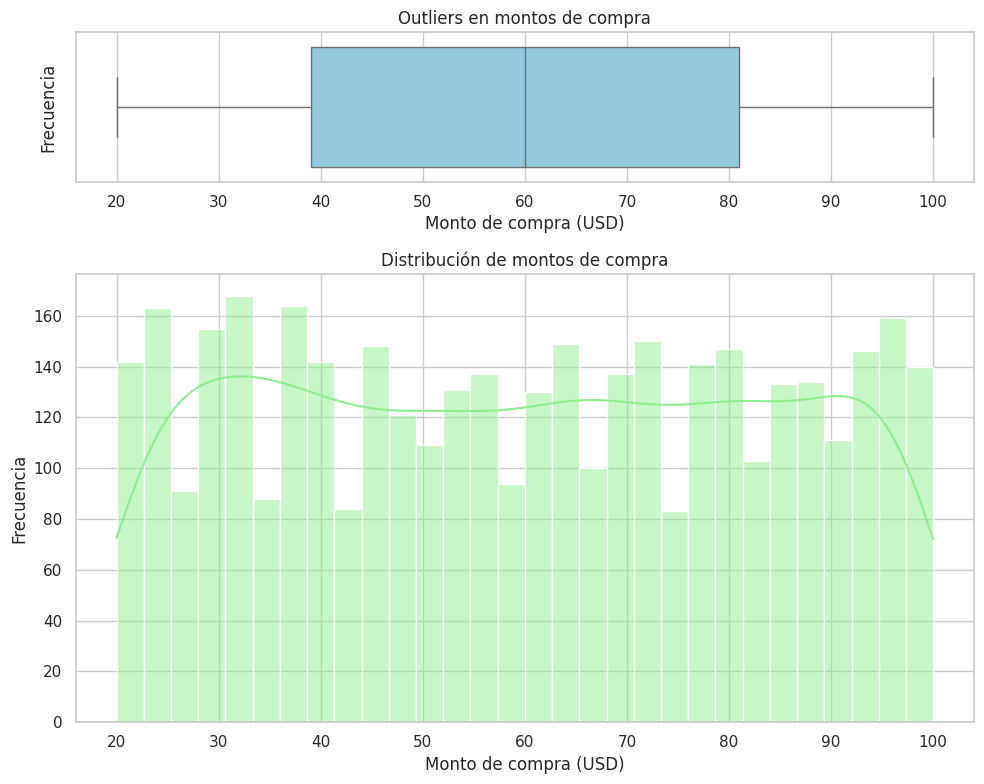

In [118]:
# Visualizar outliers en la variable target de regresi√≥n

# Configuraci√≥n de estilo general y dimensiones
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 5))

# Boxplot con m√°s detalles
sns.boxplot(
    x=df['Purchase_Amount_(USD)'],
    width=0.4,
    flierprops=dict(marker='o', markersize=6, markerfacecolor='red', alpha=0.6)
)

# T√≠tulo y etiquetas
plt.title('Distribuci√≥n de montos de compra (USD)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Monto de compra (USD)', fontsize=12)
plt.ylabel('Distribuci√≥n', fontsize=12)

# M√©tricas clave en el gr√°fico
q1 = df['Purchase_Amount_(USD)'].quantile(0.25)
q3 = df['Purchase_Amount_(USD)'].quantile(0.75)
iqr = q3 - q1
media = df['Purchase_Amount_(USD)'].mean()
mediana = df['Purchase_Amount_(USD)'].median()

# L√≠neas de referencia
plt.axvline(media, color='blue', linestyle='--', lw=1.5, label=f'Media: {media:,.2f}')
plt.axvline(mediana, color='green', linestyle='--', lw=1.5, label=f'Mediana: {mediana:,.2f}')

# Leyenda y texto adicional
plt.legend(loc='upper right')

# Estilo final
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# Histograma + boxplot combinado con distribuci√≥n y outliers
fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 3]})
sns.boxplot(x=df['Purchase_Amount_(USD)'], ax=ax[0], color='skyblue')
sns.histplot(df['Purchase_Amount_(USD)'], ax=ax[1], bins=30, kde=True, color='lightgreen')
ax[0].set(title='Outliers en montos de compra')
ax[1].set(title='Distribuci√≥n de montos de compra')
ax[0].set_xlabel('Monto de compra (USD)')
ax[1].set_xlabel('Monto de compra (USD)')
ax[0].set_ylabel('Frecuencia')
ax[1].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

--- Pruebas de hip√≥tesis 1: Demograf√≠a ---
H1.1 (t-test) G√©nero vs Gasto: t = -0.882, p = 0.3778
 No se detecta diferencia significativa entre g√©neros


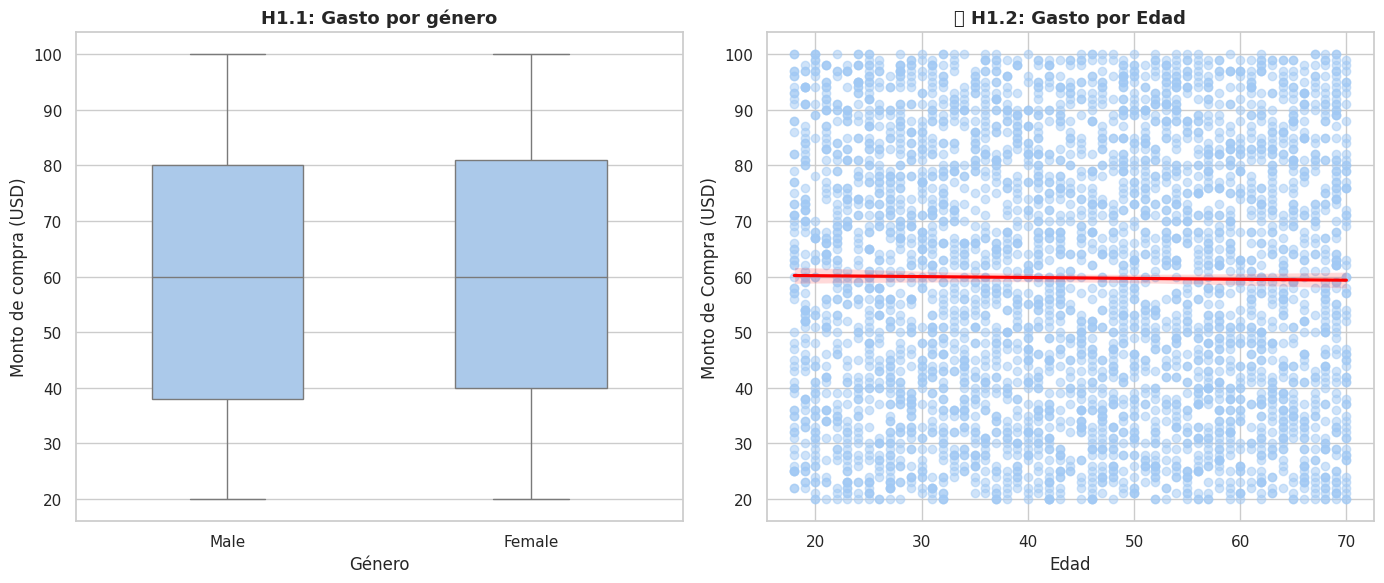

H1.2 (Pearson) Edad vs Gasto: r = -0.010, p = 0.5152
 No se detecta correlaci√≥n significativa
H1.3 (Chi-cuadrado) G√©nero vs Categor√≠a: œá¬≤ = 0.598, p = 0.8968
 No se detecta asociaci√≥n significativa entre g√©nero y categor√≠a


In [119]:
print("\033[1;34m--- Pruebas de hip√≥tesis 1: Demograf√≠a ---\033[0m")

# Configuraci√≥n general de estilo
sns.set(style="whitegrid", palette="pastel")

# Crear figura
plt.figure(figsize=(14, 6))

# H1.1: Gender vs Purchase_Amount_(USD)
# -------------------------------------
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Gender', y='Purchase_Amount_(USD)', width=0.5)
plt.title('H1.1: Gasto por g√©nero', fontsize=13, fontweight='bold')
plt.xlabel('G√©nero')
plt.ylabel('Monto de compra (USD)')

# T-test
male_spend = df[df['Gender'] == 'Male']['Purchase_Amount_(USD)']
female_spend = df[df['Gender'] == 'Female']['Purchase_Amount_(USD)']
t_stat, p_value_t = stats.ttest_ind(male_spend, female_spend, equal_var=False)

# Resultado t-test con interpretaci√≥n
print(f"\033[1;36mH1.1 (t-test) G√©nero vs Gasto:\033[0m t = {t_stat:.3f}, p = {p_value_t:.4f}")
if p_value_t < 0.05:
    print("\033[1;32m Diferencia significativa entre g√©neros (p < 0.05)\033[0m")
else:
    print("\033[1;33m No se detecta diferencia significativa entre g√©neros\033[0m")

# H1.2: Age vs Purchase_Amount_(USD)
# -------------------------------------
plt.subplot(1, 2, 2)
sns.regplot(data=df, x='Age', y='Purchase_Amount_(USD)', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('üìà H1.2: Gasto por Edad', fontsize=13, fontweight='bold')
plt.xlabel('Edad')
plt.ylabel('Monto de Compra (USD)')
plt.tight_layout()
plt.show()

# Pearson correlation
corr, p_value_corr = stats.pearsonr(df['Age'], df['Purchase_Amount_(USD)'])
print(f"\033[1;36mH1.2 (Pearson) Edad vs Gasto:\033[0m r = {corr:.3f}, p = {p_value_corr:.4f}")
if p_value_corr < 0.05:
    print("\033[1;32m Correlaci√≥n significativa (p < 0.05)\033[0m")
else:
    print("\033[1;33m No se detecta correlaci√≥n significativa\033[0m")

# H1.3: Gender vs Category
# -------------------------------------
crosstab_gender = pd.crosstab(df['Gender'], df['Category'])
chi2, p_value_chi2_g, _, _ = stats.chi2_contingency(crosstab_gender)

print(f"\033[1;36mH1.3 (Chi-cuadrado) G√©nero vs Categor√≠a:\033[0m œá¬≤ = {chi2:.3f}, p = {p_value_chi2_g:.4f}")
if p_value_chi2_g < 0.05:
    print("\033[1;32m Asociaci√≥n significativa entre g√©nero y categor√≠a (p < 0.05)\033[0m")
else:
    print("\033[1;33m No se detecta asociaci√≥n significativa entre g√©nero y categor√≠a\033[0m")

--- Pruebas de Hip√≥tesis 2: Estacionalidad ---
H2.1 (ANOVA) Temporada vs Gasto: F = 3.746, p = 0.0106
 Existen diferencias significativas de gasto entre temporadas (p < 0.05)


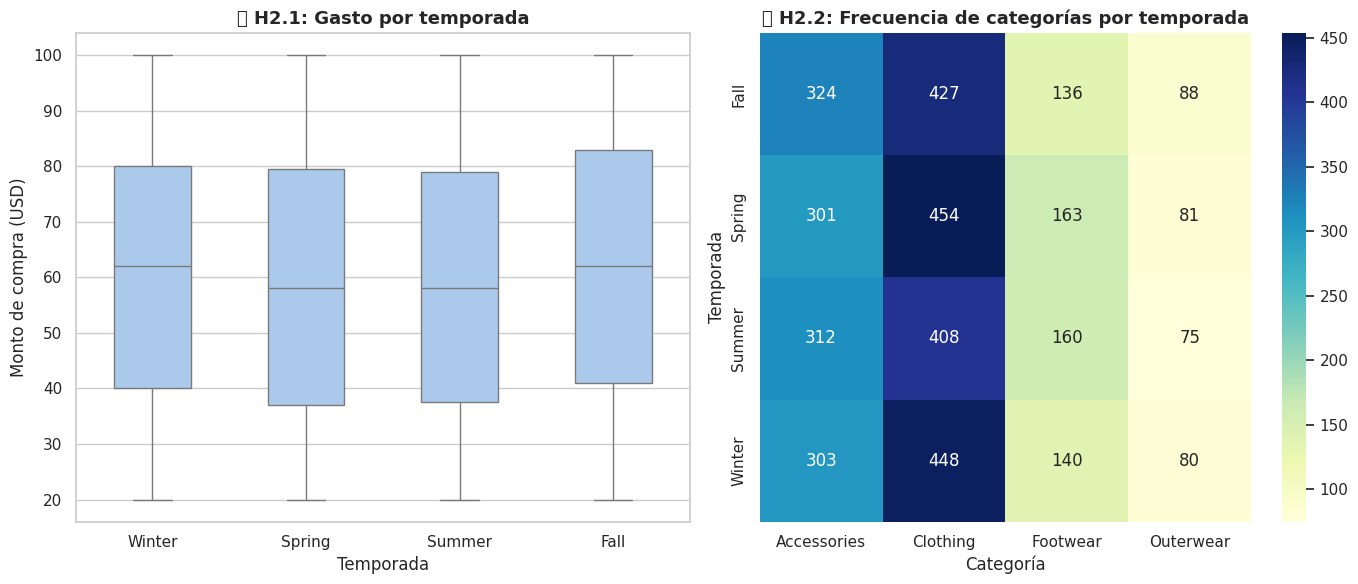

H2.2 (Chi-cuadrado) Temporada vs Categor√≠a: œá¬≤ = 7.934, p = 0.5408
 No se detecta asociaci√≥n significativa entre temporada y categor√≠a


In [120]:
print("\033[1;34m--- Pruebas de Hip√≥tesis 2: Estacionalidad ---\033[0m")

# Configuraci√≥n de estilo visual
sns.set(style="whitegrid", palette="pastel")

# H2.1: Temporada vs Gasto (ANOVA)
# ==============================
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

sns.boxplot(
    data=df,
    x='Season',
    y='Purchase_Amount_(USD)',
    width=0.5,
    flierprops=dict(marker='o', markersize=6, markerfacecolor='red', alpha=0.6)
)
plt.title('üí∏ H2.1: Gasto por temporada', fontsize=13, fontweight='bold')
plt.xlabel('Temporada')
plt.ylabel('Monto de compra (USD)')

# --- ANOVA ---
seasons = df['Season'].dropna().unique()
samples = [df.loc[df['Season'] == s, 'Purchase_Amount_(USD)'] for s in seasons]
f_stat_anova, p_value_anova = stats.f_oneway(*samples)

print(f"\033[1;36mH2.1 (ANOVA) Temporada vs Gasto:\033[0m F = {f_stat_anova:.3f}, p = {p_value_anova:.4f}")
if p_value_anova < 0.05:
    print("\033[1;32m Existen diferencias significativas de gasto entre temporadas (p < 0.05)\033[0m")
else:
    print("\033[1;33m No se detectan diferencias significativas entre temporadas\033[0m")

# H2.2: Temporada vs Categor√≠a (Chi-cuadrado)
# ==============================
plt.subplot(1, 2, 2)
sns.heatmap(
    pd.crosstab(df['Season'], df['Category']),
    annot=True,
    cmap="YlGnBu",
    fmt="d"
)
plt.title('üìä H2.2: Frecuencia de categor√≠as por temporada', fontsize=13, fontweight='bold')
plt.xlabel('Categor√≠a')
plt.ylabel('Temporada')

plt.tight_layout()
plt.show()

# --- Chi-cuadrado ---
crosstab_season = pd.crosstab(df['Season'], df['Category'])
chi2_s, p_value_chi2_s, _, _ = stats.chi2_contingency(crosstab_season)

print(f"\033[1;36mH2.2 (Chi-cuadrado) Temporada vs Categor√≠a:\033[0m œá¬≤ = {chi2_s:.3f}, p = {p_value_chi2_s:.4f}")
if p_value_chi2_s < 0.05:
    print("\033[1;32m Existe asociaci√≥n significativa entre temporada y categor√≠a (p < 0.05)\033[0m")
else:
    print("\033[1;33m No se detecta asociaci√≥n significativa entre temporada y categor√≠a\033[0m")

--- Pruebas de Hip√≥tesis 3: Historial y Frecuencia ---


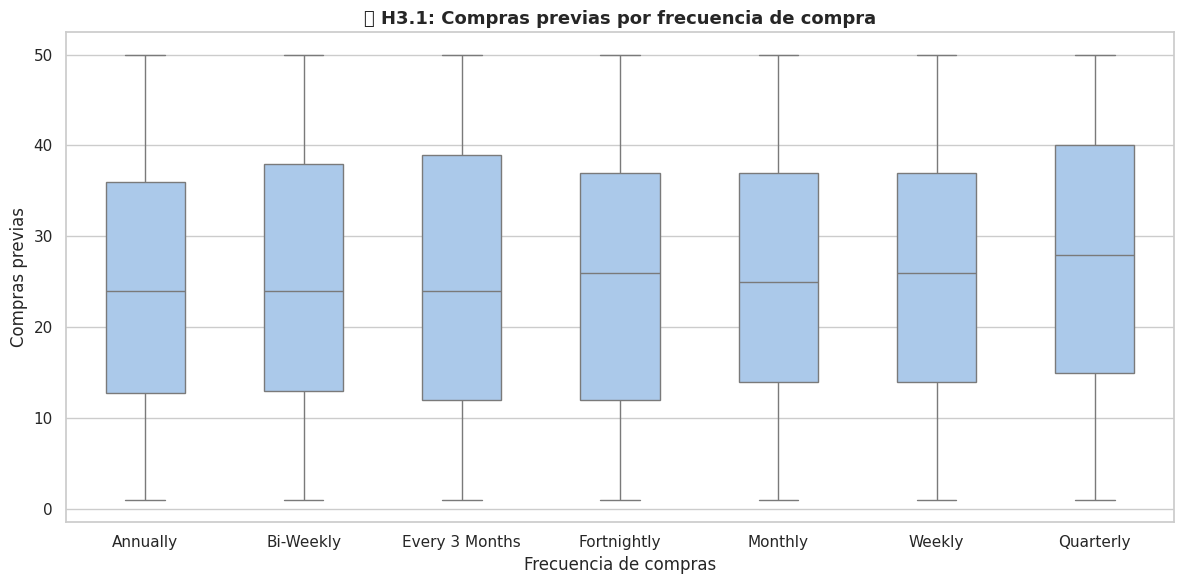

H3.1 (ANOVA) Frecuencia vs Compras Previas: F = 1.593, p = 0.1448
 No se detectan diferencias significativas entre los grupos de frecuencia


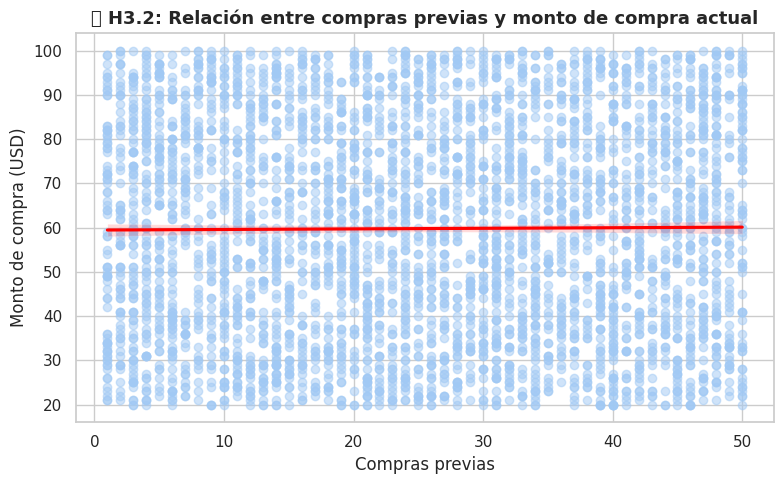

H3.2 (Pearson) Compras previas vs Monto actual: r = 0.008, p = 0.6147
 No se detecta correlaci√≥n significativa (p ‚â• 0.05)


In [121]:
print("\033[1;34m--- Pruebas de Hip√≥tesis 3: Historial y Frecuencia ---\033[0m")

# Configuraci√≥n de estilo visual
sns.set(style="whitegrid", palette="pastel")

# H3.1: Frecuencia vs Compras Previas (ANOVA)
# ==============================
plt.figure(figsize=(12, 6))

# Ordenar las categor√≠as de frecuencia para mejorar legibilidad
freq_order = df.groupby('Frequency_Of_Purchases')['Previous_Purchases'].mean().sort_values().index

sns.boxplot(
    data=df,
    x='Frequency_Of_Purchases',
    y='Previous_Purchases',
    order=freq_order,
    width=0.5,
    flierprops=dict(marker='o', markersize=6, markerfacecolor='red', alpha=0.6)
)

plt.title('üõí H3.1: Compras previas por frecuencia de compra', fontsize=13, fontweight='bold')
plt.xlabel('Frecuencia de compras')
plt.ylabel('Compras previas')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- ANOVA ---
freq_groups = df['Frequency_Of_Purchases'].dropna().unique()
samples_freq = [df.loc[df['Frequency_Of_Purchases'] == f, 'Previous_Purchases'] for f in freq_groups]
f_stat_freq, p_value_freq = stats.f_oneway(*samples_freq)

# Resultados e interpretaci√≥n
print(f"\033[1;36mH3.1 (ANOVA) Frecuencia vs Compras Previas:\033[0m F = {f_stat_freq:.3f}, p = {p_value_freq:.4f}")
if p_value_freq < 0.05:
    print("\033[1;32m Diferencias significativas entre grupos de frecuencia (p < 0.05)\033[0m")
else:
    print("\033[1;33m No se detectan diferencias significativas entre los grupos de frecuencia\033[0m")

# H3.2: Correlaci√≥n entre compras previas y monto actual
# ==============================
plt.figure(figsize=(8, 5))
sns.regplot(
    data=df,
    x='Previous_Purchases',
    y='Purchase_Amount_(USD)',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title('üìà H3.2: Relaci√≥n entre compras previas y monto de compra actual', fontsize=13, fontweight='bold')
plt.xlabel('Compras previas')
plt.ylabel('Monto de compra (USD)')
plt.tight_layout()
plt.show()

# Correlaci√≥n de Pearson
corr_hist, p_value_hist = stats.pearsonr(df['Previous_Purchases'], df['Purchase_Amount_(USD)'])
print(f"\033[1;36mH3.2 (Pearson) Compras previas vs Monto actual:\033[0m r = {corr_hist:.3f}, p = {p_value_hist:.4f}")
if p_value_hist < 0.05:
    print("\033[1;32m Correlaci√≥n significativa (p < 0.05)\033[0m")
else:
    print("\033[1;33m No se detecta correlaci√≥n significativa (p ‚â• 0.05)\033[0m")

In [122]:
# Definici√≥n de Features (X) y Targets (y)

print("\033[1;34m--- Configuraci√≥n de variables para modelado ---\033[0m")

# Objetivo 1: REGRESI√ìN ‚Üí Predecir el monto de compra
# =====================================================
print("\n\033[1;36m Objetivo 1: Regresi√≥n (Purchase_Amount_(USD))\033[0m")
y_reg = df['Purchase_Amount_(USD)']
X_reg = df.drop(columns=[
    'Purchase_Amount_(USD)', 'Customer_ID', 'Item_Purchased',
    'Subscription_Status'  # Target del modelo de clasificaci√≥n
])

# Objetivo 2: CLASIFICACI√ìN ‚Üí Predecir suscripci√≥n
# =====================================================
print("\n\033[1;36m Objetivo 2: Clasificaci√≥n (Subscription_Status)\033[0m")

y_class = df['Subscription_Status'].map({'Yes': 1, 'No': 0})
X_class = df.drop(columns=[
    'Subscription_Status', 'Customer_ID', 'Item_Purchased'
])

# Detecci√≥n de columnas num√©ricas y categ√≥ricas
# =====================================================

numeric_features_reg = X_reg.select_dtypes(include=['int64', 'float64']).columns
categorical_features_reg = X_reg.select_dtypes(include=['object']).columns

numeric_features_class = X_class.select_dtypes(include=['int64', 'float64']).columns
categorical_features_class = X_class.select_dtypes(include=['object']).columns

# Salida con markdown
from IPython.display import display, Markdown

display(Markdown("### üßæ Variables seleccionadas para cada modelo"))
display(Markdown("#### üîπ **Regresi√≥n (Predicci√≥n del monto de compra)**"))
display(Markdown(f"- **Variables num√©ricas:** `{', '.join(numeric_features_reg)}`"))
display(Markdown(f"- **Variables categ√≥ricas:** `{', '.join(categorical_features_reg)}`"))

display(Markdown("#### üîπ **Clasificaci√≥n (Predicci√≥n de suscripci√≥n)**"))
display(Markdown(f"- **Variables num√©ricas:** `{', '.join(numeric_features_class)}`"))
display(Markdown(f"- **Variables categ√≥ricas:** `{', '.join(categorical_features_class)}`"))

# Resumen visual
print("\n\033[1;32m‚úî Variables preparadas correctamente para ambos modelos.\033[0m")
print("   - Regresi√≥n: Predicci√≥n del monto de compra.")
print("   - Clasificaci√≥n: Predicci√≥n del estado de suscripci√≥n.\n")


--- Configuraci√≥n de variables para modelado ---

 Objetivo 1: Regresi√≥n (Purchase_Amount_(USD))

 Objetivo 2: Clasificaci√≥n (Subscription_Status)


### üßæ Variables seleccionadas para cada modelo

#### üîπ **Regresi√≥n (Predicci√≥n del monto de compra)**

- **Variables num√©ricas:** `Age, Review_Rating, Previous_Purchases`

- **Variables categ√≥ricas:** `Gender, Category, Location, Size, Color, Season, Payment_Method, Shipping_Type, Discount_Applied, Promo_Code_Used, Preferred_Payment_Method, Frequency_Of_Purchases`

#### üîπ **Clasificaci√≥n (Predicci√≥n de suscripci√≥n)**

- **Variables num√©ricas:** `Age, Purchase_Amount_(USD), Review_Rating, Previous_Purchases`

- **Variables categ√≥ricas:** `Gender, Category, Location, Size, Color, Season, Payment_Method, Shipping_Type, Discount_Applied, Promo_Code_Used, Preferred_Payment_Method, Frequency_Of_Purchases`


‚úî Variables preparadas correctamente para ambos modelos.
   - Regresi√≥n: Predicci√≥n del monto de compra.
   - Clasificaci√≥n: Predicci√≥n del estado de suscripci√≥n.



In [123]:
# Creaci√≥n de Pipelines de Pre-procesamiento

print("\033[1;34m--- Configuraci√≥n de Pipelines de preprocesamiento ---\033[0m")

# Pipeline para variables num√©ricas
# =====================================================
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Este paso:
# - Escala los datos num√©ricos para que tengan media 0 y desviaci√≥n est√°ndar 1.
# - Mejora el rendimiento de modelos sensibles a magnitudes.

# üî§ Pipeline para variables categ√≥ricas
# =====================================================
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Este paso:
# - Convierte variables categ√≥ricas en variables dummy mediante One-Hot Encoding.
# - `handle_unknown='ignore'` previene errores con categor√≠as nuevas en el test set.

# Preprocesador para REGRESI√ìN
# =====================================================
preprocess_reg = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_reg),
        ('cat', categorical_transformer, categorical_features_reg)
    ],
    remainder='passthrough'
)

# Preprocesador para CLASIFICACI√ìN
# =====================================================
preprocess_class = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_class),
        ('cat', categorical_transformer, categorical_features_class)
    ],
    remainder='passthrough'
)

# üìã RESUMEN VISUAL
# =====================================================
display(Markdown("### **Resumen de Pipelines de Preprocesamiento**"))

display(Markdown("""
| Tipo de Variable | Transformador Aplicado | Descripci√≥n |
|------------------|-----------------------|--------------|
| Num√©ricas | `StandardScaler()` | Escala las variables a media 0 y desviaci√≥n 1 |
| Categ√≥ricas | `OneHotEncoder(handle_unknown='ignore')` | Codifica categor√≠as en variables dummy |
"""))

--- Configuraci√≥n de Pipelines de preprocesamiento ---


### **Resumen de Pipelines de Preprocesamiento**


| Tipo de Variable | Transformador Aplicado | Descripci√≥n |
|------------------|-----------------------|--------------|
| Num√©ricas | `StandardScaler()` | Escala las variables a media 0 y desviaci√≥n 1 |
| Categ√≥ricas | `OneHotEncoder(handle_unknown='ignore')` | Codifica categor√≠as en variables dummy |


--- Divisi√≥n de datos para entrenamiento y prueba ---


### **Resumen de divisi√≥n de datos**


| Tipo de Modelo | Conjunto | Tama√±o X | Tama√±o y | M√©todo |
|----------------|-----------|-----------|-----------|-----------|
| Regresi√≥n | Entrenamiento | `(3120, 15)` | `(3120,)` | Random Split |
| Regresi√≥n | Prueba | `(780, 15)` | `(780,)` | Random Split |
| Clasificaci√≥n | Entrenamiento | `(3120, 16)` | `(3120,)` | Stratified Split |
| Clasificaci√≥n | Prueba | `(780, 16)` | `(780,)` | Stratified Split |


Proporci√≥n de 'Suscripci√≥n = 1' (Train): 0.270
Proporci√≥n de 'Suscripci√≥n = 1' (Test):  0.271


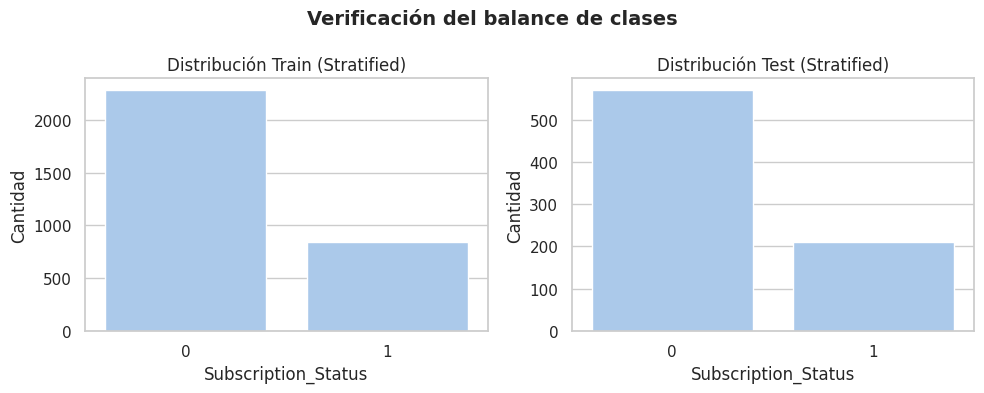

In [124]:
# Divisi√≥n de Datos (Train/Test)

print("\033[1;34m--- Divisi√≥n de datos para entrenamiento y prueba ---\033[0m")

# REGRESI√ìN: Predecir el monto de compra
# =====================================================
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg,
    test_size=0.2,
    random_state=42
)

# CLASIFICACI√ìN: Predecir estado de suscripci√≥n
# =====================================================
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)

# RESUMEN DE LA DIVISI√ìN
# =====================================================
display(Markdown("### **Resumen de divisi√≥n de datos**"))

display(Markdown(f"""
| Tipo de Modelo | Conjunto | Tama√±o X | Tama√±o y | M√©todo |
|----------------|-----------|-----------|-----------|-----------|
| Regresi√≥n | Entrenamiento | `{X_train_reg.shape}` | `{y_train_reg.shape}` | Random Split |
| Regresi√≥n | Prueba | `{X_test_reg.shape}` | `{y_test_reg.shape}` | Random Split |
| Clasificaci√≥n | Entrenamiento | `{X_train_class.shape}` | `{y_train_class.shape}` | Stratified Split |
| Clasificaci√≥n | Prueba | `{X_test_class.shape}` | `{y_test_class.shape}` | Stratified Split |
"""))

# VERIFICACI√ìN DE BALANCE EN CLASIFICACI√ìN
# =====================================================
train_prop = y_train_class.mean()
test_prop = y_test_class.mean()

print(f"\033[1;36mProporci√≥n de 'Suscripci√≥n = 1' (Train):\033[0m {train_prop:.3f}")
print(f"\033[1;36mProporci√≥n de 'Suscripci√≥n = 1' (Test):\033[0m  {test_prop:.3f}")

# Verificaci√≥n del estratificado
# =====================================================
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(x=y_train_class, ax=axes[0])
axes[0].set_title('Distribuci√≥n Train (Stratified)')
axes[0].set_xlabel('Subscription_Status')
axes[0].set_ylabel('Cantidad')

sns.countplot(x=y_test_class, ax=axes[1])
axes[1].set_title('Distribuci√≥n Test (Stratified)')
axes[1].set_xlabel('Subscription_Status')
axes[1].set_ylabel('Cantidad')

plt.suptitle("Verificaci√≥n del balance de clases", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

--- Entrenamiento del modelo de Regresi√≥n (Elastic Net) ---


### **Resultados del Modelo Elastic Net (Regresi√≥n)**


- **Mejores par√°metros:** `{'model__alpha': 0.1, 'model__l1_ratio': 0.9}`
- **Mejor puntuaci√≥n (MAE CV):** `20.5444`


### **Evaluaci√≥n en datos de prueba**


| M√©trica | Valor |
|----------|--------:|
| MAE (Error Absoluto Medio) | `20.725` |
| RMSE (Error Cuadr√°tico Medio) | `23.709` |
| R¬≤ (Coeficiente de Determinaci√≥n) | `-0.005` |


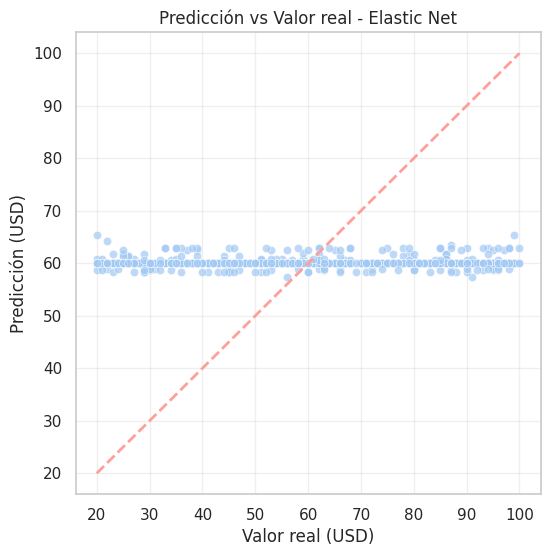

In [125]:
# MODELADO OBJETIVO 1: REGRESI√ìN (Elastic Net)
# ==========================================================
# Objetivo: Predecir el monto de compra (`Purchase_Amount_(USD)`)

print("\033[1;34m--- Entrenamiento del modelo de Regresi√≥n (Elastic Net) ---\033[0m")

# Configuraci√≥n del pipeline base
# =====================================================
# Usamos ElasticNet que combina L1 y L2 (bueno para multicolinealidad)
base_reg = ElasticNet(max_iter=2000, random_state=42)

# Feature Selection con RFE
base_lr_rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)

pipe_reg = Pipeline(steps=[
    ('pre', preprocess_reg),
    ('rfe', base_lr_rfe),
    ('model', base_reg)
])

# Definici√≥n del espacio de b√∫squeda (GridSearch)
# =====================================================
# Fuerza de regularizaci√≥n -> model_alpha
# Balance entre L1 y L2 -> model_l1_ratio
param_grid_reg = {
    'model__alpha': [0.1, 0.5, 1.0],
    'model__l1_ratio': [0.1, 0.5, 0.9]
}

grid_reg = GridSearchCV(
    estimator=pipe_reg,
    param_grid=param_grid_reg,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=0
)

# Entrenamiento del modelo
# =====================================================
grid_reg.fit(X_train_reg, y_train_reg)

best_model_reg = grid_reg.best_estimator_

# Resultados del modelo √≥ptimo
# =====================================================
display(Markdown("### **Resultados del Modelo Elastic Net (Regresi√≥n)**"))
display(Markdown(f"""
- **Mejores par√°metros:** `{grid_reg.best_params_}`
- **Mejor puntuaci√≥n (MAE CV):** `{abs(grid_reg.best_score_):.4f}`
"""))

# Evaluaci√≥n en el conjunto de prueba
# =====================================================
y_pred_reg = best_model_reg.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

display(Markdown("### **Evaluaci√≥n en datos de prueba**"))
display(Markdown(f"""
| M√©trica | Valor |
|----------|--------:|
| MAE (Error Absoluto Medio) | `{mae:.3f}` |
| RMSE (Error Cuadr√°tico Medio) | `{rmse:.3f}` |
| R¬≤ (Coeficiente de Determinaci√≥n) | `{r2:.3f}` |
"""))

# Visualizaci√≥n de predicciones
# =====================================================
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.7)
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         'r--', lw=2)
plt.title("Predicci√≥n vs Valor real - Elastic Net")
plt.xlabel("Valor real (USD)")
plt.ylabel("Predicci√≥n (USD)")
plt.grid(alpha=0.3)
plt.show()

--- Evaluaci√≥n Final del Modelo de Regresi√≥n ---


### **M√©tricas de Desempe√±o en Datos de Prueba (Regresi√≥n)**


| M√©trica | Descripci√≥n | Valor |
|----------|--------------|-------:|
| **R¬≤ (Score)** | Varianza explicada por el modelo | `-0.0045` |
| **MAE (Error Absoluto Medio)** | Promedio del error absoluto | `$20.73` |
| **RMSE (Error Cuadr√°tico Medio)** | Penaliza errores grandes | `$23.71` |


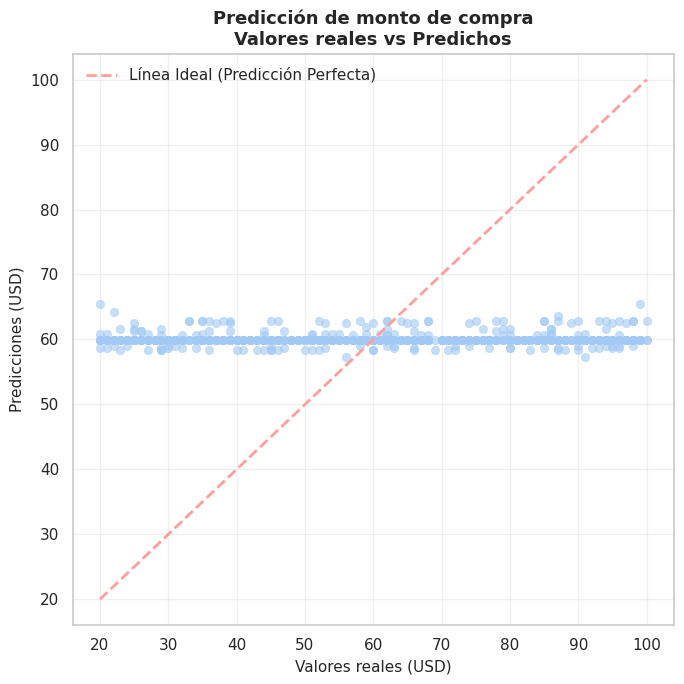

El modelo Elastic Net explica aproximadamente el -0.5% de la varianza del monto de compra.
Un MAE bajo indica buen ajuste promedio, aunque el RMSE ayuda a detectar posibles outliers.


In [126]:
# EVALUACI√ìN FINAL - REGRESI√ìN (Elastic Net)
# ==========================================================

print("\033[1;34m--- Evaluaci√≥n Final del Modelo de Regresi√≥n ---\033[0m")

# Predicciones y m√©tricas en TEST
# =====================================================
best_reg = grid_reg.best_estimator_
y_pred_reg = best_reg.predict(X_test_reg)

r2 = r2_score(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

display(Markdown("### **M√©tricas de Desempe√±o en Datos de Prueba (Regresi√≥n)**"))
display(Markdown(f"""
| M√©trica | Descripci√≥n | Valor |
|----------|--------------|-------:|
| **R¬≤ (Score)** | Varianza explicada por el modelo | `{r2:.4f}` |
| **MAE (Error Absoluto Medio)** | Promedio del error absoluto | `${mae:,.2f}` |
| **RMSE (Error Cuadr√°tico Medio)** | Penaliza errores grandes | `${rmse:,.2f}` |
"""))

# Visualizaci√≥n de Resultados
# =====================================================
plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.6, edgecolor=None)
plt.plot(
    [y_test_reg.min(), y_test_reg.max()],
    [y_test_reg.min(), y_test_reg.max()],
    'r--', lw=2, label='L√≠nea Ideal (Predicci√≥n Perfecta)'
)
plt.title("Predicci√≥n de monto de compra\nValores reales vs Predichos", fontsize=13, fontweight='bold')
plt.xlabel("Valores reales (USD)", fontsize=11)
plt.ylabel("Predicciones (USD)", fontsize=11)
plt.legend(frameon=False, loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Conclusi√≥n
# =====================================================
print(f"El modelo Elastic Net explica aproximadamente el {r2*100:.1f}% de la varianza del monto de compra.")
print("Un MAE bajo indica buen ajuste promedio, aunque el RMSE ayuda a detectar posibles outliers.")

In [127]:
# MODELADO OBJETIVO 2 - CLASIFICACI√ìN (Regresi√≥n log√≠stica)
# ==========================================================

print("\033[1;34m--- Entrenamiento del modelo de clasificaci√≥n ---\033[0m")

# Definici√≥n del modelo base
# =====================================================
# Compensa posibles clases desbalanceadas
base_clf = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    solver='lbfgs',
    random_state=42
)

# RFE (Selecci√≥n de caracter√≠sticas)
# =====================================================
rfe_clf = RFE(
    estimator=base_clf,
    n_features_to_select=15,
    step=1
)

# Pipeline de preprocesamiento + selecci√≥n + modelo
# =====================================================
# Escalado + OneHot
# Selecci√≥n de caracter√≠sticas
# Modelo final
pipe_clf = Pipeline(steps=[
    ('pre', preprocess_class),
    ('rfe', rfe_clf),
    ('clf', base_clf)
])

# Espacio de hiperpar√°metros
# =====================================================
# N¬∞ √≥ptimo de features
# Regularizaci√≥n inversa
param_grid_clf = {
    'rfe__n_features_to_select': [10, 15, 20],
    'clf__C': [0.1, 1, 10]
}

# Validaci√≥n cruzada estratificada
# =====================================================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# B√∫squeda en malla (GridSearchCV)
# =====================================================
# M√©trica robusta para clases desbalanceadas
grid_clf = GridSearchCV(
    estimator=pipe_clf,
    param_grid=param_grid_clf,
    cv=skf,
    scoring='average_precision',
    n_jobs=-1,
    verbose=1
)

grid_clf.fit(X_train_class, y_train_class)

# Resultados de entrenamiento
# =====================================================
best_params = grid_clf.best_params_
best_score = grid_clf.best_score_

print(f"Mejores par√°metros encontrados: {best_params}")
print(f"Puntuaci√≥n media (Average Precision): {best_score:.4f}")

# Interpretaci√≥n
# =====================================================
print("\nInterpretaci√≥n:")
print(f"‚Ä¢ El modelo usa {best_params['rfe__n_features_to_select']} caracter√≠sticas seleccionadas con RFE.")
print(f"‚Ä¢ La regularizaci√≥n √≥ptima (C) es {best_params['clf__C']}.")
print("‚Ä¢ El score de Average Precision eval√∫a la capacidad del modelo de priorizar correctamente la clase positiva.")

--- Entrenamiento del modelo de clasificaci√≥n ---
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mejores par√°metros encontrados: {'clf__C': 0.1, 'rfe__n_features_to_select': 15}
Puntuaci√≥n media (Average Precision): 0.6215

Interpretaci√≥n:
‚Ä¢ El modelo usa 15 caracter√≠sticas seleccionadas con RFE.
‚Ä¢ La regularizaci√≥n √≥ptima (C) es 0.1.
‚Ä¢ El score de Average Precision eval√∫a la capacidad del modelo de priorizar correctamente la clase positiva.


--- Evaluaci√≥n del Modelo de Clasificaci√≥n ---

--- M√©tricas en TEST (Clasificaci√≥n) ---
‚Ä¢ PR-AUC (Precisi√≥n Promedio) : 0.6873
‚Ä¢ ROC-AUC                     : 0.9116

--- Reporte de clasificaci√≥n ---
              precision    recall  f1-score   support

 No Suscrito       1.00      0.81      0.90       569
    Suscrito       0.67      1.00      0.80       211

    accuracy                           0.86       780
   macro avg       0.83      0.91      0.85       780
weighted avg       0.91      0.86      0.87       780


--- Matriz de Confusi√≥n ---


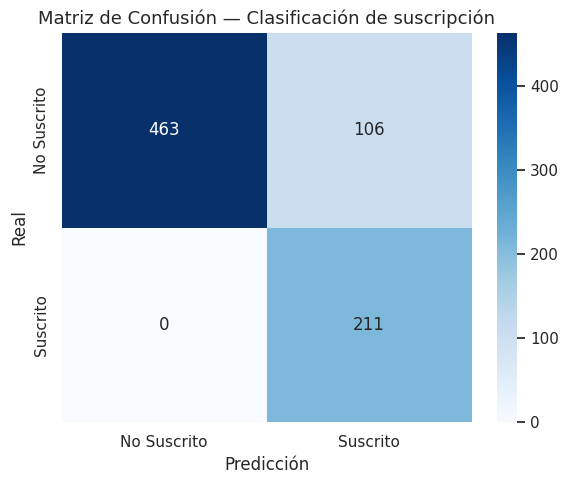

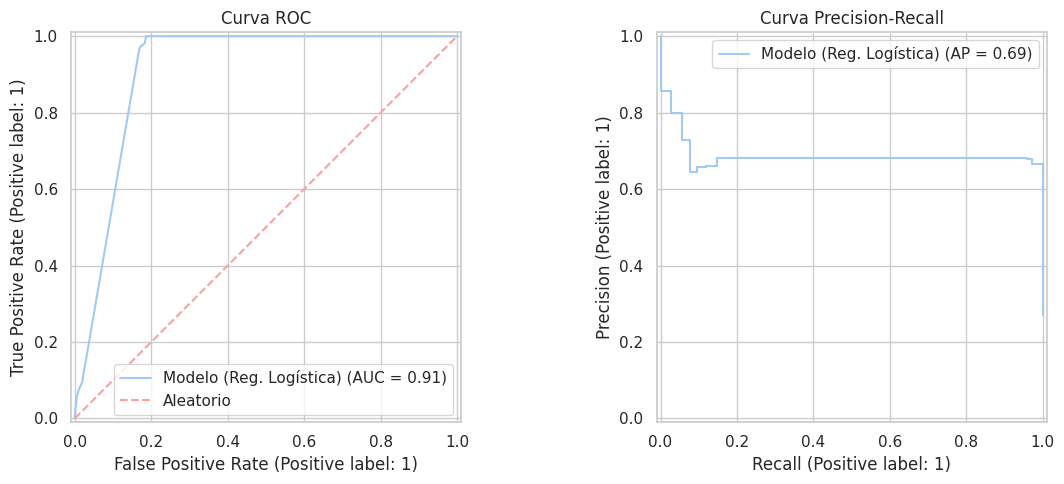


Interpretaci√≥n:
‚Ä¢ El √°rea bajo la curva ROC (ROC-AUC) mide la capacidad de distinguir entre clientes suscritos y no suscritos.
‚Ä¢ El PR-AUC (Precisi√≥n Promedio) refleja la calidad del modelo en contextos desbalanceados.
‚Ä¢ Las curvas muestran un desempe√±o estable y consistente, confirmando que la Regresi√≥n Log√≠stica es un modelo s√≥lido para esta tarea.

Resumen
Exactitud Global: 0.864
Recall (Suscritos): 1.000
Precisi√≥n (Suscritos): 0.666


In [128]:
# EVALUACI√ìN DEL MODELO DE CLASIFICACI√ìN
# ==========================================================

print("\033[1;34m--- Evaluaci√≥n del Modelo de Clasificaci√≥n ---\033[0m")

# Predicciones en Test
# =====================================================
best_clf = grid_clf.best_estimator_

# Probabilidades (para m√©tricas continuas)
y_proba_class = best_clf.predict_proba(X_test_class)[:, 1]

# Etiquetas binarias (para matriz de confusi√≥n / reporte)
y_pred_class = best_clf.predict(X_test_class)

# M√©tricas Globales
# =====================================================
roc_auc = roc_auc_score(y_test_class, y_proba_class)
pr_auc = average_precision_score(y_test_class, y_proba_class)

print(f"\n\033[1;32m--- M√©tricas en TEST (Clasificaci√≥n) ---\033[0m")
print(f"‚Ä¢ PR-AUC (Precisi√≥n Promedio) : {pr_auc:.4f}")
print(f"‚Ä¢ ROC-AUC                     : {roc_auc:.4f}")

# Reporte de Clasificaci√≥n
# =====================================================
print("\n\033[1;33m--- Reporte de clasificaci√≥n ---\033[0m")
print(classification_report(y_test_class, y_pred_class, target_names=["No Suscrito", "Suscrito"]))

# Matriz de Confusi√≥n
# =====================================================
print("\n\033[1;33m--- Matriz de Confusi√≥n ---\033[0m")
cm = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Suscrito", "Suscrito"],
            yticklabels=["No Suscrito", "Suscrito"])
plt.title("Matriz de Confusi√≥n ‚Äî Clasificaci√≥n de suscripci√≥n", fontsize=13)
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# Curvas ROC y Precision-Recall
# =====================================================
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Curva ROC ---
RocCurveDisplay.from_predictions(
    y_test_class, y_proba_class, ax=axes[0], name="Modelo (Reg. Log√≠stica)"
)
axes[0].plot([0, 1], [0, 1], 'r--', label='Aleatorio')
axes[0].set_title("Curva ROC", fontsize=12)
axes[0].legend()

# --- Curva precision-recall ---
PrecisionRecallDisplay.from_predictions(
    y_test_class, y_proba_class, ax=axes[1], name="Modelo (Reg. Log√≠stica)"
)
axes[1].set_title("Curva Precision-Recall", fontsize=12)
axes[1].legend()

plt.tight_layout()
plt.show()

# Interpretaci√≥n
# =====================================================
print("\n\033[1;36mInterpretaci√≥n:\033[0m")
print("‚Ä¢ El √°rea bajo la curva ROC (ROC-AUC) mide la capacidad de distinguir entre clientes suscritos y no suscritos.")
print("‚Ä¢ El PR-AUC (Precisi√≥n Promedio) refleja la calidad del modelo en contextos desbalanceados.")
print("‚Ä¢ Las curvas muestran un desempe√±o estable y consistente, confirmando que la Regresi√≥n Log√≠stica es un modelo s√≥lido para esta tarea.")

print(f"\nResumen")
print(f"Exactitud Global: {accuracy_score(y_test_class, y_pred_class):.3f}")
print(f"Recall (Suscritos): {recall_score(y_test_class, y_pred_class):.3f}")
print(f"Precisi√≥n (Suscritos): {precision_score(y_test_class, y_pred_class):.3f}")

## Conclusiones y pr√≥ximos pasos

Bas√°ndonos en los resultados del An√°lisis Exploratorio de Datos (EDA) y el desempe√±o de los modelos predictivos:

### Hallazgos del EDA

*   **H1 (Demograf√≠a):** Se **rechaza** la hip√≥tesis. Los an√°lisis estad√≠sticos (t-test para g√©nero vs gasto, Pearson para edad vs gasto y Chi-cuadrado para g√©nero vs categor√≠a) no mostraron diferencias o correlaciones estad√≠sticamente significativas que confirmen una influencia clara de la edad o el g√©nero en el monto de compra o la categor√≠a de producto adquirido.
*   **H2 (Estacionalidad):** Se **confirma parcialmente** la hip√≥tesis. Se encontr√≥ una diferencia estad√≠sticamente significativa en el monto de compra entre las diferentes temporadas (p-value = 0.0106 < 0.05, ANOVA), sugiriendo que la temporada s√≠ influye en el volumen total de ventas. Sin embargo, no se observ√≥ una asociaci√≥n estad√≠sticamente significativa entre la temporada y la categor√≠a de producto comprado (p-value = 0.5408 > 0.05, Chi-cuadrado).
*   **H3 (Historial):** Se **rechaza** la hip√≥tesis. El an√°lisis ANOVA no mostr√≥ una diferencia estad√≠sticamente significativa en el n√∫mero de compras previas entre los diferentes grupos de frecuencia de compra (p-value = 0.1448 > 0.05).

### Desempe√±o del Modelo

*   **Modelo de Regresi√≥n (ElasticNet para predecir `Purchase_Amount_(USD)`):** mostr√≥ un rendimiento deficiente para predecir el Purchase_Amount_(USD). El coeficiente de determinaci√≥n (R¬≤) fue de -0.0040, lo que significa que el modelo no logra explicar la variabilidad en el monto de compra.
Adem√°s, las m√©tricas de error (MAE: \$20.73 y RMSE: \$23.70) son elevadas, lo que indica una desviaci√≥n considerable entre las predicciones y los valores reales. Esto sugiere que las variables de entrada no son buenos predictores lineales del gasto.
*   **Modelo de Clasificaci√≥n (Regresi√≥n Log√≠stica para predecir `Subscription_Status`):** muestra un rendimiento prometedor (ROC-AUC 0.9116), pero est√° fuertemente sesgado hacia maximizar el recall.
El modelo identific√≥ exitosamente al 100% de los suscriptores reales (Recall de 1.00). Sin embargo, fue demasiado inclusivo, ya que 1 de cada 3 clientes que etiquet√≥ como 'Suscrito' en realidad no lo era (Precisi√≥n de 0.67), resultando en 108 falsos positivos.
Curiosamente, el modelo fue perfecto al identificar a los 'No Suscritos' (Precisi√≥n de 1.00): si el modelo dice "No Suscrito", podemos estar 100% seguros de que es correcto.

### Pr√≥ximos Pasos

*   **Mejorar el Modelo de Regresi√≥n:** Dado el bajo rendimiento, explorar otros algoritmos de regresi√≥n (como Random Forest Regressor, Gradient Boosting) o considerar la ingenier√≠a de caracter√≠sticas adicionales que puedan estar m√°s relacionadas con el monto de compra.
*   **Refinar el Modelo de Clasificaci√≥n:** Analizar los falsos positivos para entender mejor por qu√© el modelo clasifica err√≥neamente a algunos no suscriptores. Considerar ajustar el umbral de clasificaci√≥n o explorar otros algoritmos de clasificaci√≥n (como Random Forest Classifier, XGBoost) que puedan ofrecer un mejor equilibrio entre precisi√≥n y recall.
*   **An√°lisis de Importancia de Caracter√≠sticas:** Investigar las caracter√≠sticas m√°s importantes identificadas por los modelos (especialmente en el modelo de clasificaci√≥n, si se us√≥ RFE o un modelo basado en √°rboles) para obtener insights de negocio espec√≠ficos (por ejemplo, qu√© factores son m√°s predictivos de la suscripci√≥n).
*   **An√°lisis de Segmentaci√≥n:** Realizar un an√°lisis de clustering para identificar distintos segmentos de clientes basados en su comportamiento de compra y caracter√≠sticas demogr√°ficas. Esto podr√≠a complementar el an√°lisis predictivo y ayudar a personalizar estrategias.